In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA Sample data.csv")

In [3]:
df.columns = [name.lower().replace(' ', '_') for name in df.columns]
df.head()

### changing column names this way allows to call them in 2 different ways:
### df['varname']
### or
### df.varname

,column1,individual_key,household_key,member_flag,city,state_-_grouped,zip5,zip9,fsv_cmsi_flag,fsv_credit_card_flag,...,sc_vehicle_manufacturer_name,sc_vehicle_model_name,svc_facility_name,svc_facility_type,total_cost,tow_destination_latitude,tow_destination_longitude,tow_destination_name,was_duplicated,was_towed_to_aar_referral
0,0,10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0
2,2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,TOYOTA,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0
3,3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0
4,4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0


In [13]:
df['renew_method'].value_counts(dropna = False)

NOTICE          18969
AUTO RENEW       2373
PAYMENT PLAN        1
NaN                 1
Name: renew_method, dtype: int64

In [4]:
df = df.assign(missing_count = df.isna().sum(axis = 1))
df.shape

(21344, 114)

In [5]:
df.missing_count.value_counts().sort_index(ascending = False)

95       1
74       3
73     173
72     532
71     271
70     117
69     521
68    1037
67     554
66     304
65     213
64     178
63     152
62     163
61     226
60     183
59     146
58     157
57     181
56     159
55     200
54     209
53     186
52     157
51     196
50     288
49     337
48     296
47     121
46      48
      ... 
34     106
33     158
32     369
31     452
30     309
29     401
28     444
27     473
26     517
25     590
24     459
23     330
22     397
21     414
20     489
19     399
18     619
17     796
16     949
15    1205
14    1531
13    1304
12     679
11     246
10     147
9       82
8       24
7       12
6        4
5        6
Name: missing_count, Length: 70, dtype: int64

In [6]:
hh_key = df.household_key[df.missing_count == 95]
print(hh_key)
df_hh_temp = df.individual_key[df.household_key == hh_key.iloc[0]]
print(df_hh_temp.shape)

0    10462590.0
Name: household_key, dtype: float64
(1,)


In [7]:
print(df.shape)
df = df.drop(df[df.missing_count == 95].index)
print(df.shape)

(21344, 114)
(21343, 114)


In [8]:
df.head()

,column1,individual_key,household_key,member_flag,city,state_-_grouped,zip5,zip9,fsv_cmsi_flag,fsv_credit_card_flag,...,sc_vehicle_model_name,svc_facility_name,svc_facility_type,total_cost,tow_destination_latitude,tow_destination_longitude,tow_destination_name,was_duplicated,was_towed_to_aar_referral,missing_count
1,1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0,15
2,2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0,16
3,3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0,16
4,4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0,16
5,5,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,CAMRY,AAA SNE RI LIGHT SERVICE,mobile battery service,53.0,0.0,0.0,NaN,0.0,0.0,16


In [9]:
df = df.reset_index()

In [10]:
df = df.drop('index', axis = 1)
df.head()

,column1,individual_key,household_key,member_flag,city,state_-_grouped,zip5,zip9,fsv_cmsi_flag,fsv_credit_card_flag,...,sc_vehicle_model_name,svc_facility_name,svc_facility_type,total_cost,tow_destination_latitude,tow_destination_longitude,tow_destination_name,was_duplicated,was_towed_to_aar_referral,missing_count
0,1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0,15
1,2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0,16
2,3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0,16
3,4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0,16
4,5,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,CAMRY,AAA SNE RI LIGHT SERVICE,mobile battery service,53.0,0.0,0.0,NaN,0.0,0.0,16


In [11]:
columns_to_drop = ['member_key', 'call_killed','dispatch_code2description', 'dtl_prob1_code_description','is_duplicate', 'member_match_flag', 'membership_id', 'right_individual_key']

In [12]:
df = df.drop(columns_to_drop, axis = 1)
df.shape

(21343, 106)

CHECK FOR ANOMALITY IN HOUSEHOLD MEMBERS NUMBER

In [13]:
df_hh = df.groupby(['household_key'])['individual_key'].nunique()
pd.unique(df_hh.sort_values())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14], dtype=int64)

In [14]:
df_hh.head()

household_key
875.0      8
969.0      4
3338.0     3
8718.0     2
11524.0    3
Name: individual_key, dtype: int64

In [15]:
df_hh.shape

(5240,)

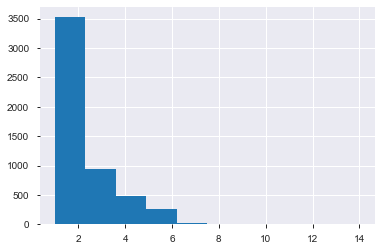

In [16]:
df_hh.hist()

In [17]:
df_hh.value_counts().sort_index()

1     1543
2     1980
3      934
4      484
5      198
6       64
7       24
8        6
9        4
10       1
11       1
14       1
Name: individual_key, dtype: int64

More than two members per household is realistic in two cases:
1. Members below 26 years old
2. A lot of members joining and separating from the household
To analyse later

CHECKING ANOMALITIES IN THE NUMBER OF RECORDS PER HOUSEHOLD

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  28  30  32  37  55 300]
2      1287
1      1073
3       775
4       556
5       401
6       279
7       217
8       151
9       103
10       86
11       70
12       50
13       43
14       33
15       21
17       15
18       13
16       11
19       11
20       10
24        7
22        5
23        5
21        5
25        3
37        2
26        2
30        2
28        1
32        1
300       1
55        1
Name: individual_key, dtype: int64


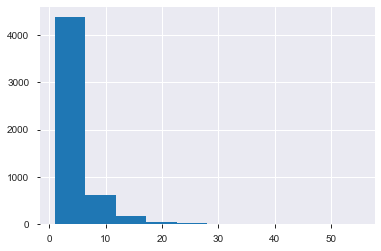

In [18]:
df_hh = df.groupby('household_key')['individual_key'].count()
print(pd.unique(df_hh.sort_values()))
print(df_hh.value_counts())
df_hh[df_hh != 300].hist()

Household with 300 records should be excluded.

In [19]:
hh_index = df_hh[df_hh == 300].index[0]
hh_index

90083049.0

In [20]:
print(df.shape)
df = df.drop(df[df.household_key == hh_index].index)
print(df.shape)

(21343, 106)
(21043, 106)


In [21]:
df = df.reset_index()
df.tail()

,index,column1,individual_key,household_key,member_flag,city,state_-_grouped,zip5,zip9,fsv_cmsi_flag,...,sc_vehicle_model_name,svc_facility_name,svc_facility_type,total_cost,tow_destination_latitude,tow_destination_longitude,tow_destination_name,was_duplicated,was_towed_to_aar_referral,missing_count
21038,21338,99994,25797262.0,20330346.0,Y,WARWICK,RI,2886.0,28867552.0,N,...,V70,HERB'S SUNOCO,service station,36.00,41.0,-71.0,Tasca Automotive Group West,0.0,0.0,24
21039,21339,99995,25797262.0,20330346.0,Y,WARWICK,RI,2886.0,28867552.0,N,...,V70,AAA SNE RI LIGHT SERVICE,mobile battery service,53.00,0.0,0.0,NaN,0.0,0.0,25
21040,21340,99996,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,...,ECONOLINE,Aaa Sne Ri Light Service,mobile battery service,58.85,NaN,NaN,NaN,0.0,0.0,17
21041,21341,99997,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,...,SONATA,Aaa Sne Ri Light Service,mobile battery service,58.85,NaN,NaN,NaN,0.0,0.0,17
21042,21342,99998,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,31


In [22]:
df = df.drop('index', axis = 1)
df.tail()

,column1,individual_key,household_key,member_flag,city,state_-_grouped,zip5,zip9,fsv_cmsi_flag,fsv_credit_card_flag,...,sc_vehicle_model_name,svc_facility_name,svc_facility_type,total_cost,tow_destination_latitude,tow_destination_longitude,tow_destination_name,was_duplicated,was_towed_to_aar_referral,missing_count
21038,99994,25797262.0,20330346.0,Y,WARWICK,RI,2886.0,28867552.0,N,N,...,V70,HERB'S SUNOCO,service station,36.00,41.0,-71.0,Tasca Automotive Group West,0.0,0.0,24
21039,99995,25797262.0,20330346.0,Y,WARWICK,RI,2886.0,28867552.0,N,N,...,V70,AAA SNE RI LIGHT SERVICE,mobile battery service,53.00,0.0,0.0,NaN,0.0,0.0,25
21040,99996,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,N,...,ECONOLINE,Aaa Sne Ri Light Service,mobile battery service,58.85,NaN,NaN,NaN,0.0,0.0,17
21041,99997,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,N,...,SONATA,Aaa Sne Ri Light Service,mobile battery service,58.85,NaN,NaN,NaN,0.0,0.0,17
21042,99998,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,31


TRANSFORMING VARIABLES

In [23]:
df['income'].value_counts().sort_index()

10-19,999         688
100-149,999      2577
150 - 174,999     438
175 - 199,999     600
20-29,999         425
200 - 249,999     424
250K+             397
30-39,999         553
40-49,999         771
50-59,999         888
60-69,999         541
70-79,999        1000
80-89,999          15
90-99,999        2391
Under 10K         226
Name: income, dtype: int64

In [23]:
df = df.assign(active_expiration_year = pd.to_datetime(df.active_expiration_date).dt.year)
df.tail()

,column1,individual_key,household_key,member_flag,city,state_-_grouped,zip5,zip9,fsv_cmsi_flag,fsv_credit_card_flag,...,svc_facility_name,svc_facility_type,total_cost,tow_destination_latitude,tow_destination_longitude,tow_destination_name,was_duplicated,was_towed_to_aar_referral,missing_count,active_expiration_year
21038,99994,25797262.0,20330346.0,Y,WARWICK,RI,2886.0,28867552.0,N,N,...,HERB'S SUNOCO,service station,36.00,41.0,-71.0,Tasca Automotive Group West,0.0,0.0,24,2019
21039,99995,25797262.0,20330346.0,Y,WARWICK,RI,2886.0,28867552.0,N,N,...,AAA SNE RI LIGHT SERVICE,mobile battery service,53.00,0.0,0.0,NaN,0.0,0.0,25,2019
21040,99996,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,N,...,Aaa Sne Ri Light Service,mobile battery service,58.85,NaN,NaN,NaN,0.0,0.0,17,2020
21041,99997,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,N,...,Aaa Sne Ri Light Service,mobile battery service,58.85,NaN,NaN,NaN,0.0,0.0,17,2020
21042,99998,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,31,2020


BIRTH DATE: COMBINE DATA FROM TWO VARIABLES, FILL MISSING WITH TENURE + AVERAGE AGE AT JOINING

In [24]:
df = df.assign(birth_date_year = pd.to_datetime(df.birth_date_mmddyyyy).dt.year)
df.tail()

,column1,individual_key,household_key,member_flag,city,state_-_grouped,zip5,zip9,fsv_cmsi_flag,fsv_credit_card_flag,...,svc_facility_type,total_cost,tow_destination_latitude,tow_destination_longitude,tow_destination_name,was_duplicated,was_towed_to_aar_referral,missing_count,active_expiration_year,birth_date_year
21038,99994,25797262.0,20330346.0,Y,WARWICK,RI,2886.0,28867552.0,N,N,...,service station,36.00,41.0,-71.0,Tasca Automotive Group West,0.0,0.0,24,2019,1922.0
21039,99995,25797262.0,20330346.0,Y,WARWICK,RI,2886.0,28867552.0,N,N,...,mobile battery service,53.00,0.0,0.0,NaN,0.0,0.0,25,2019,1922.0
21040,99996,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,N,...,mobile battery service,58.85,NaN,NaN,NaN,0.0,0.0,17,2020,1941.0
21041,99997,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,N,...,mobile battery service,58.85,NaN,NaN,NaN,0.0,0.0,17,2020,1941.0
21042,99998,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,N,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,31,2020,1941.0


In [25]:
df = df.assign(date_of_birth_year = pd.to_datetime(df.date_of_birth).dt.year)
df.tail()

,column1,individual_key,household_key,member_flag,city,state_-_grouped,zip5,zip9,fsv_cmsi_flag,fsv_credit_card_flag,...,total_cost,tow_destination_latitude,tow_destination_longitude,tow_destination_name,was_duplicated,was_towed_to_aar_referral,missing_count,active_expiration_year,birth_date_year,date_of_birth_year
21038,99994,25797262.0,20330346.0,Y,WARWICK,RI,2886.0,28867552.0,N,N,...,36.00,41.0,-71.0,Tasca Automotive Group West,0.0,0.0,24,2019,1922.0,NaN
21039,99995,25797262.0,20330346.0,Y,WARWICK,RI,2886.0,28867552.0,N,N,...,53.00,0.0,0.0,NaN,0.0,0.0,25,2019,1922.0,NaN
21040,99996,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,N,...,58.85,NaN,NaN,NaN,0.0,0.0,17,2020,1941.0,NaN
21041,99997,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,N,...,58.85,NaN,NaN,NaN,0.0,0.0,17,2020,1941.0,NaN
21042,99998,28273400.0,8325571.0,Y,WARWICK,RI,2886.0,28868235.0,N,N,...,NaN,NaN,NaN,NaN,0.0,0.0,31,2020,1941.0,NaN


In [26]:
df_year = df[['date_of_birth_year', 'birth_date_year', 'member_tenure_years']][df['date_of_birth_year'].notnull() & df['birth_date_year'].notnull() & (df['date_of_birth_year'] != df['birth_date_year'])].tail()

In [27]:
print(df_year.shape)
df_year.head()

(5, 3)


,date_of_birth_year,birth_date_year,member_tenure_years
20587,1948.0,1947.0,50.0
20588,1948.0,1947.0,50.0
20664,1924.0,1923.0,10.0
20745,1931.0,1985.0,55.0
20866,1947.0,1940.0,0.0


In [28]:
df = df.assign(birth_year = df.date_of_birth_year)

In [29]:
print(df.birth_year.isna().sum())
df['birth_year'] = df['birth_year'].fillna(df['birth_date_year'])
print(df.birth_year.isna().sum())

10860
2790


In [30]:
df['member_tenure_years'][df['birth_year'].isna() & df['member_tenure_years'].notna()].shape

(2790,)

In [31]:
df = df.assign(join_aaa_year = pd.to_datetime(df.join_aaa_date).dt.year)
df = df.assign(join_club_year = pd.to_datetime(df.join_club_date).dt.year)

In [32]:
df = df.assign(join_aaa_age = df.join_aaa_year - df.birth_year)

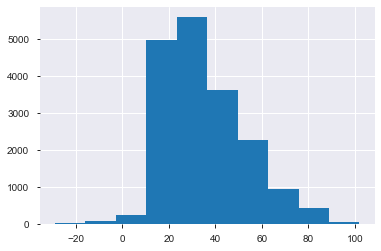

In [33]:
df.join_aaa_age.hist()

In [34]:
df.join_aaa_age.describe()

count    18253.000000
mean        35.331781
std         17.340454
min        -29.000000
25%         22.000000
50%         31.000000
75%         46.000000
max        102.000000
Name: join_aaa_age, dtype: float64

In [35]:
df.join_aaa_age[df.join_aaa_age > 0].describe()

count    18096.000000
mean        35.699547
std         16.944950
min          1.000000
25%         22.000000
50%         32.000000
75%         46.000000
max        102.000000
Name: join_aaa_age, dtype: float64

In [36]:
df.join_aaa_age[df.join_aaa_age > 17].describe()

count    16225.000000
mean        38.097134
std         16.221818
min         18.000000
25%         25.000000
50%         34.000000
75%         48.000000
max        102.000000
Name: join_aaa_age, dtype: float64

In [37]:
df.join_aaa_age.mean().astype(int)

35

In [38]:
print(df.birth_year.isna().sum())
df['birth_year'] = df['birth_year'].fillna(2019 - df.member_tenure_years - df.join_aaa_age.mean().astype(int))
print(df.birth_year.isna().sum())

2790
0


In [39]:
df = df.assign(birth_year_missing = (df.birth_date_mmddyyyy.isna() & df.date_of_birth.isna()).astype(int))

In [40]:
df.birth_year_missing.sum()

2790

In [41]:
df = df.assign(fsv_any = ((df.fsv_cmsi_flag == "Y") | 
                          (df.fsv_credit_card_flag == "Y") | 
                          (df.fsv_deposit_program_flag == "Y") |
                          (df.fsv_home_equity_flag == "Y") |
                          (df.fsv_id_theft_flag == "Y") |
                          (df.fsv_mortgage_flag == "Y")
                         ).astype(int))

In [42]:
df.fsv_any.sum()

2608

In [43]:
df.fsv_any.isna().sum()

0

In [44]:
df.fsv_any.value_counts()

0    18435
1     2608
Name: fsv_any, dtype: int64

In [45]:
df = df.assign(new_product_any = ((df.fsv_any == 1) |
                                  (df.ins_client_flag == "Y") |
                                  (df.trv_globalware_flag == "Y")
                                 ))

In [46]:
df.new_product_any.sum()

6751

Dummy for those who were part of another AAA club before joining AAA Northeast

In [47]:
df = df.assign(aaa_before_club = (df.join_club_year - df.join_aaa_year))
df.aaa_before_club.describe()

count    21043.000000
mean         0.925724
std          5.069364
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         59.000000
Name: aaa_before_club, dtype: float64

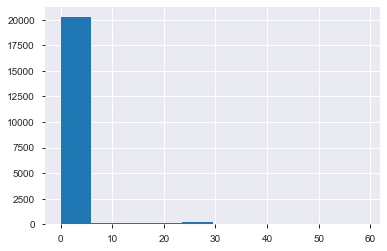

In [48]:
df.aaa_before_club.hist()

In [49]:
print(df.join_aaa_date[df.aaa_before_club == 59], df.join_club_date[df.aaa_before_club == 59])

13501    01/06/1941 00:00
13502    01/06/1941 00:00
13503    01/06/1941 00:00
13504    01/06/1941 00:00
13505    01/06/1941 00:00
13506    01/06/1941 00:00
13507    01/06/1941 00:00
13508    01/06/1941 00:00
13509    01/06/1941 00:00
13510    01/06/1941 00:00
Name: join_aaa_date, dtype: object 13501    05/09/2000 00:00
13502    05/09/2000 00:00
13503    05/09/2000 00:00
13504    05/09/2000 00:00
13505    05/09/2000 00:00
13506    05/09/2000 00:00
13507    05/09/2000 00:00
13508    05/09/2000 00:00
13509    05/09/2000 00:00
13510    05/09/2000 00:00
Name: join_club_date, dtype: object


In [50]:
df = df.assign(aaa_before_club_dummy = (df.aaa_before_club > 0).astype(int))
df.aaa_before_club_dummy.sum()

1125

KEY DUMMY VARIABLES: FOR THE TWO CLUSTERS OF DATA WITH THE SAME MISSING VARIABLES

In [51]:
df = df.assign(fin_missing = df.credit_ranges.isna().astype(int))
df.fin_missing.sum()

9042

In [52]:
df = df.assign(roadside_missing = df.sc_date.isna().astype(int))
df.roadside_missing.sum()

7344

TRANSFORMATION OF OTHER VARIABLES

In [53]:
df.billing_code_description.value_counts(dropna = False)

Renewal Mbr Billing    12881
Cancellation            6118
Downgrade Member        1095
Upgrade Member           524
New Member               184
Renewal to Daily         122
RJ                        45
Payment Reversal          40
Cancel Obsolete           31
PO Cancel Obsolete         3
Name: billing_code_description, dtype: int64

In [54]:
billing_to_group = df.billing_code_description.value_counts(dropna = False).index[6:]
billing_to_group

Index(['RJ', 'Payment Reversal', 'Cancel Obsolete', 'PO Cancel Obsolete'], dtype='object')

In [55]:
df = df.assign(billing_grouped = df.billing_code_description)
for i in billing_to_group:
    df.billing_grouped = df.billing_grouped.replace(i, 'Other')
df.billing_grouped.value_counts(dropna = False)

Renewal Mbr Billing    12881
Cancellation            6118
Downgrade Member        1095
Upgrade Member           524
New Member               184
Renewal to Daily         122
Other                    119
Name: billing_grouped, dtype: int64

In [56]:
df.breakdown_state.value_counts(dropna = False)

RI     12381
NaN     7344
MA      1108
CT        92
NJ        53
NY        39
NH        14
VT         3
ME         3
PA         2
MD         2
FL         1
VA         1
Name: breakdown_state, dtype: int64

In [57]:
breakdown_state_to_group = df.breakdown_state.value_counts(dropna = False).index[4:]
breakdown_state_to_group

Index(['NJ', 'NY', 'NH', 'VT', 'ME', 'PA', 'MD', 'FL', 'VA'], dtype='object')

In [58]:
df = df.assign(breakdown_state_grouped = df.breakdown_state)
for i in breakdown_state_to_group:
    df.breakdown_state_grouped = df.breakdown_state_grouped.replace(i, 'Other')
df.breakdown_state_grouped.value_counts(dropna = False)

RI       12381
NaN       7344
MA        1108
Other      118
CT          92
Name: breakdown_state_grouped, dtype: int64

In [59]:
pd.crosstab(df['state_-_grouped'],df['breakdown_state'])

breakdown_state,CT,FL,MA,MD,ME,NH,NJ,NY,PA,RI,VA,VT
state_-_grouped,,,,,,,,,,,,
CT,19,0,103,0,0,0,0,1,0,46,0,0
RI,73,1,1005,2,3,14,53,38,2,12335,1,3


In [60]:
df = df.assign(breakdown_foreign_state = ((df['state_-_grouped'] != df['breakdown_state']) & 
                                          (df['state_-_grouped'].notna()) & 
                                          (df['breakdown_state'].notna())).astype('float64'))
df.breakdown_foreign_state.replace()
df.breakdown_foreign_state.value_counts(dropna = False)

0.0    19698
1.0     1345
Name: breakdown_foreign_state, dtype: int64

Transform number of children into numeric variable

In [61]:
df = df.assign(children_num = df.number_of_children.replace('No children', 0))
df.children_num = df.children_num.replace('One Child', 1)
df.children_num = df.children_num.replace('Two Children', 2)
df.children_num = df.children_num.replace('Three Children', 3)
df.children_num = df.children_num.replace('Four Children', 4)
df.children_num = df.children_num.replace('Five Children', 5)
df.children_num = df.children_num.replace('Six Children', 6)

df.children_num.value_counts(dropna=False).sort_index()

0.0    5482
1.0    3871
2.0    1573
3.0     750
4.0     276
5.0      45
6.0       4
NaN    9042
Name: children_num, dtype: int64

In [62]:
df_child_missing = df[df.number_of_children.isna()][['children', 'number_of_children']]

In [63]:
df_child_missing.children.describe()

count     0
unique    0
Name: children, dtype: int64

Presence of children does not provide additional info comparing to number of children.

In [64]:
df.children_num = df.children_num.fillna(0)

In [65]:
df = df.assign(children_missing = (df.number_of_children.isna()))
df.children_missing = df.children_missing.astype('float64')

In [66]:
df.children_missing.value_counts()

0.0    12001
1.0     9042
Name: children_missing, dtype: int64

Languages

In [67]:
df.language.value_counts()

English       10980
Unknown         686
Italian          99
Spanish          99
Portuguese       51
Hebrew           17
French           13
Arabic           12
German           12
Hindu             9
Polish            8
Greek             6
Chinese           2
Korean            2
Russian           2
Japanese          2
Vietnamese        1
Name: language, dtype: int64

In [68]:
df.language.isna().sum()

9042

In [69]:
language_to_replace=df.language.value_counts().index.tolist()

In [70]:
language_to_replace = language_to_replace[2:]

In [71]:
language_to_replace

['Italian',
 'Spanish',
 'Portuguese',
 'Hebrew',
 'French',
 'Arabic',
 'German',
 'Hindu',
 'Polish',
 'Greek',
 'Chinese',
 'Korean',
 'Russian',
 'Japanese',
 'Vietnamese']

In [72]:
df = df.assign(language_grouped = df.language)
for i in language_to_replace:
    df.language_grouped = df.language_grouped.replace(i, 'Other')

In [73]:
df.language_grouped.value_counts()

English    10980
Unknown      686
Other        335
Name: language_grouped, dtype: int64

Grouping counties

In [74]:
df.county.value_counts()

PROVIDENCE     10616
KENT            5064
WASHINGTON      2624
NEWPORT         1494
BRISTOL          771
NEW LONDON        94
HARTFORD          74
WINDHAM           73
FAIRFIELD         60
MIDDLESEX         49
NEW HAVEN         47
NORFOLK           15
TOLLAND           13
LITCHFIELD         8
WORCESTER          6
SUFFOLK            5
LEE                5
ESSEX              4
PLYMOUTH           3
WASHOE             2
MIDLAND            2
WATERFORD          2
LEXINGTON          2
YORK               1
AROOSTOOK          1
BERNALILLO         1
KING               1
COWLITZ            1
SARASOTA           1
BARNSTABLE         1
CHILTON            1
SOMERSET           1
SAINT JOHNS        1
Name: county, dtype: int64

In [75]:
df.county.isna().sum()

0

In [76]:
counties_to_group = df.county.value_counts().index[5:]
counties_to_group

Index(['NEW LONDON', 'HARTFORD', 'WINDHAM', 'FAIRFIELD', 'MIDDLESEX',
       'NEW HAVEN', 'NORFOLK', 'TOLLAND', 'LITCHFIELD', 'WORCESTER', 'SUFFOLK',
       'LEE', 'ESSEX', 'PLYMOUTH', 'WASHOE', 'MIDLAND', 'WATERFORD',
       'LEXINGTON', 'YORK', 'AROOSTOOK', 'BERNALILLO', 'KING', 'COWLITZ',
       'SARASOTA', 'BARNSTABLE', 'CHILTON', 'SOMERSET', 'SAINT JOHNS'],
      dtype='object')

In [77]:
df = df.assign(county_grouped = df.county)
for i in counties_to_group:
    df.county_grouped = df.county_grouped.replace(i, 'Other')
df.county_grouped.value_counts()

PROVIDENCE    10616
KENT           5064
WASHINGTON     2624
NEWPORT        1494
BRISTOL         771
Other           474
Name: county_grouped, dtype: int64

In [78]:
df.credit_ranges.value_counts().sort_index()

499 & Less      12
500-549        165
550-599        197
600-649        883
650-699       1911
700-749       2542
750-799       4092
800+          1785
Unknown        414
Name: credit_ranges, dtype: int64

In [79]:
df = df.assign(credit_ranges_num = df.credit_ranges)
df.credit_ranges_num = df.credit_ranges_num.replace('499 & Less', 0)
df.credit_ranges_num = df.credit_ranges_num.replace('500-549', 1)
df.credit_ranges_num = df.credit_ranges_num.replace('550-599', 2)
df.credit_ranges_num = df.credit_ranges_num.replace('600-649', 3)
df.credit_ranges_num = df.credit_ranges_num.replace('650-699', 4)
df.credit_ranges_num = df.credit_ranges_num.replace('700-749', 5)
df.credit_ranges_num = df.credit_ranges_num.replace('750-799', 6)
df.credit_ranges_num = df.credit_ranges_num.replace('800+', 7)
df.credit_ranges_num = df.credit_ranges_num.replace('Unknown', 0)
df.credit_ranges_num = df.credit_ranges_num.fillna(0)
df.credit_ranges_num.value_counts().sort_index()

0.0    9468
1.0     165
2.0     197
3.0     883
4.0    1911
5.0    2542
6.0    4092
7.0    1785
Name: credit_ranges_num, dtype: int64

In [80]:
df.credit_ranges_num = df.credit_ranges_num.astype('int64')
df.credit_ranges_num.dtype

dtype('int64')

In [81]:
df.credit_ranges_num.isna().sum()

0

In [82]:
df = df.assign(credit_ranges_missing = (df.credit_ranges.isna()))
df.credit_ranges_missing = df.credit_ranges_missing.replace(True, 1)
df.credit_ranges_missing = df.credit_ranges_missing.replace(False, 0)
df.credit_ranges_missing.value_counts()

0.0    12001
1.0     9042
Name: credit_ranges_missing, dtype: int64

In [83]:
df.gender.value_counts()

Female     4595
Male       4169
Unknown       9
Name: gender, dtype: int64

In [84]:
df = df.assign(gender_grouped = df.gender.replace('Unknown', np.nan))
df.gender_grouped.value_counts()

Female    4595
Male      4169
Name: gender_grouped, dtype: int64

In [85]:
df.home_owner.value_counts()

Home Owner             11112
Renter                   491
Probable Renter           10
Probable Home Owner        7
Name: home_owner, dtype: int64

In [86]:
df = df.assign(home_owner_grouped = df.home_owner.replace('Probable Renter', 'Renter'))
df.home_owner_grouped = df.home_owner_grouped.replace('Probable Home Owner', 'Home Owner')
df.home_owner_grouped.value_counts()

Home Owner    11119
Renter          501
Name: home_owner_grouped, dtype: int64

In [87]:
df.income.value_counts().sort_index()

10-19,999         688
100-149,999      2577
150 - 174,999     438
175 - 199,999     600
20-29,999         425
200 - 249,999     424
250K+             397
30-39,999         553
40-49,999         771
50-59,999         888
60-69,999         541
70-79,999        1000
80-89,999          15
90-99,999        2391
Under 10K         226
Name: income, dtype: int64

In [88]:
df = df.assign(income_mid = df.income.replace('Under 10K', 5))
df.income_mid = df.income_mid.replace('10-19,999', 15)
df.income_mid = df.income_mid.replace('20-29,999', 25)
df.income_mid = df.income_mid.replace('30-39,999', 35)
df.income_mid = df.income_mid.replace('40-49,999', 45)
df.income_mid = df.income_mid.replace('50-59,999', 55)
df.income_mid = df.income_mid.replace('60-69,999', 65)
df.income_mid = df.income_mid.replace('70-79,999', 75)
df.income_mid = df.income_mid.replace('80-89,999', 85)
df.income_mid = df.income_mid.replace('90-99,999', 95)
df.income_mid = df.income_mid.replace('100-149,999', 125)
df.income_mid = df.income_mid.replace('150 - 174,999', 162)
df.income_mid = df.income_mid.replace('175 - 199,999', 187)
df.income_mid = df.income_mid.replace('200 - 249,999', 225)
df.income_mid = df.income_mid.replace('250K+', 300)
df.income_mid = df.income_mid.fillna(0)
print(df.income_mid.dtype)
df.income_mid.value_counts().sort_index()

float64


0.0      9109
5.0       226
15.0      688
25.0      425
35.0      553
45.0      771
55.0      888
65.0      541
75.0     1000
85.0       15
95.0     2391
125.0    2577
162.0     438
187.0     600
225.0     424
300.0     397
Name: income_mid, dtype: int64

In [89]:
df = df.assign(income_missing = df.income.isna())
df.income_missing = df.income_missing.astype('float64')
df.income_missing.value_counts()

0.0    11934
1.0     9109
Name: income_missing, dtype: int64

In [90]:
df.kcl_b_ind_mosaicsgrouping.value_counts()

Autumn Years                2934
Booming with Confidence     2412
Golden Year Guardians       2099
Thriving Boomers            1663
Blue Sky Boomers            1001
Surburban Style              931
Power Elite                  916
Singles and Starters         737
Family Union                 591
Middle Class Melting Pot     549
Flourishing Families         452
Promising Families           356
Significant Singles          349
Young City Solos             177
Cultural Connections         162
Economic Challenges          116
Aspirational Fusion           90
Families in Motion            25
Pastoral Pride                21
Name: kcl_b_ind_mosaicsgrouping, dtype: int64

In [91]:
kcl_to_group = df.kcl_b_ind_mosaicsgrouping.value_counts().index[-3:]
kcl_to_group

Index(['Aspirational Fusion', 'Families in Motion', 'Pastoral Pride'], dtype='object')

In [92]:
df = df.assign(kcl_grouped = df.kcl_b_ind_mosaicsgrouping)
for i in kcl_to_group:
    df.kcl_grouped = df.kcl_grouped.replace(i, 'Other')
df.kcl_grouped.value_counts()

Autumn Years                2934
Booming with Confidence     2412
Golden Year Guardians       2099
Thriving Boomers            1663
Blue Sky Boomers            1001
Surburban Style              931
Power Elite                  916
Singles and Starters         737
Family Union                 591
Middle Class Melting Pot     549
Flourishing Families         452
Promising Families           356
Significant Singles          349
Young City Solos             177
Cultural Connections         162
Other                        136
Economic Challenges          116
Name: kcl_grouped, dtype: int64

In [93]:
df.member_phone_type.value_counts()

Wireless    8095
Landline    3089
VoIP         828
Unknown        8
Name: member_phone_type, dtype: int64

In [94]:
df.member_phone_type = df.member_phone_type.replace('Unknown', np.nan)

In [95]:
df.member_type.value_counts()

Associate    10544
Primary      10495
INsider          4
Name: member_type, dtype: int64

In [96]:
df = df.assign(member_primary = (df.member_type == 'Primary'))
df.member_primary = df.member_primary.astype('float64')
df.member_primary.value_counts(dropna = False)

0.0    10548
1.0    10495
Name: member_primary, dtype: int64

In [97]:
df.move_distance.value_counts(dropna = False).sort_index()

1 to 5 Miles           202
10 to 15 Miles          60
100 to 150 Miles         7
1000 Plus Miles         44
15 to 25 Miles          53
150 to 200 Miles         1
200 to 250 Miles         4
25 to 50 Miles          52
250 to 500 Miles         7
5 TO 10 Miles          137
50 to 75 Miles           6
500 to 1000 Miles        8
75 to 100 Miles          1
Less than 1 Mile        52
Same Zip4                7
NaN                  20402
Name: move_distance, dtype: int64

In [98]:
df = df.assign(move_num = df.move_distance.replace('1 to 5 Miles', 3))
df.move_num = df.move_num.replace('10 to 15 Miles', 13)
df.move_num = df.move_num.replace('100 to 150 Miles', 125)
df.move_num = df.move_num.replace('1000 Plus Miles', 1000)
df.move_num = df.move_num.replace('15 to 25 Miles', 20)
df.move_num = df.move_num.replace('150 to 200 Miles', 175)
df.move_num = df.move_num.replace('200 to 250 Miles', 225)
df.move_num = df.move_num.replace('25 to 50 Miles', 38)
df.move_num = df.move_num.replace('250 to 500 Miles', 375)
df.move_num = df.move_num.replace('5 TO 10 Miles', 8)
df.move_num = df.move_num.replace('50 to 75 Miles', 63)
df.move_num = df.move_num.replace('500 to 1000 Miles', 750)
df.move_num = df.move_num.replace('75 to 100 Miles', 88)
df.move_num = df.move_num.replace('Less than 1 Mile', 0)
df.move_num = df.move_num.replace('Same Zip4', 0)
df.move_num = df.move_num.fillna(0)
print(df.move_num.dtype)
df.move_num.value_counts().sort_index()

float64


0.0       20461
3.0         202
8.0         137
13.0         60
20.0         53
38.0         52
63.0          6
88.0          1
125.0         7
175.0         1
225.0         4
375.0         7
750.0         8
1000.0       44
Name: move_num, dtype: int64

In [99]:
df = df.assign(move_distance_missing = df.move_distance.isna())
df.move_distance_missing = df.move_distance_missing.astype('float64')
df.move_distance_missing.value_counts(dropna = False)

1.0    20402
0.0      641
Name: move_distance_missing, dtype: int64

In [100]:
df.occupation_group.value_counts(dropna = False).sort_index()

Blue Collar - Inferred                421
Blue Collar - Known                   230
Farmer - Inferred                       4
Management - Inferred                 622
Management - Known                    653
Office Administration - Inferred      381
Office Administration - Known         220
Other - Inferred                      578
Other - Known                         231
Professional - Inferred               425
Professional - Known                 1196
Retired - Inferred                   2390
Retired - Known                       674
Sales - Inferred                      203
Sales - Known                         245
Technical - Inferred                  248
Technical - Known                      52
NaN                                 12270
Name: occupation_group, dtype: int64

In [101]:
df = df.assign(occupation_group_grouped = df.occupation_group.replace('Farmer - Inferred', 'Other - Inferred'))
df.occupation_group_grouped = df.occupation_group_grouped.replace('Technical - Known', 'Technical')
df.occupation_group_grouped = df.occupation_group_grouped.replace('Technical - Inferred', 'Technical')
df.occupation_group_grouped.value_counts(dropna = False).sort_index()

Blue Collar - Inferred                421
Blue Collar - Known                   230
Management - Inferred                 622
Management - Known                    653
Office Administration - Inferred      381
Office Administration - Known         220
Other - Inferred                      582
Other - Known                         231
Professional - Inferred               425
Professional - Known                 1196
Retired - Inferred                   2390
Retired - Known                       674
Sales - Inferred                      203
Sales - Known                         245
Technical                             300
NaN                                 12270
Name: occupation_group_grouped, dtype: int64

In [102]:
df['plus_indicator_description'].value_counts(dropna = False).sort_index()

Basic Membership                            7250
Plus Membership                             6106
Plus Membership with Motorcycle Coverage      22
Premier Membership                           321
NaN                                         7344
Name: plus_indicator_description, dtype: int64

In [103]:
df = df.assign(plus_indicator_grouped = df.plus_indicator_description.replace('Plus Membership with Motorcycle Coverage', 'Plus Membership'))

In [104]:
df.plus_indicator_grouped.value_counts(dropna = False).sort_index()

Basic Membership      7250
Plus Membership       6128
Premier Membership     321
NaN                   7344
Name: plus_indicator_grouped, dtype: int64

In [105]:
df.prob1_code_description.value_counts(dropna = False)

NaN                            7344
Tow                            4436
Battery Service                3757
Flat Tire                      2606
Jump Start                     1358
Lockout                        1111
Extrication                     149
Unleaded, Out of Gas            145
Miscellaneous                    58
Can't start                      31
Locksmith                        17
Frozen Locks                     15
Flatbed                           6
Needs Air                         6
Bicycle Roadside Assistance       2
GOA RAP CALL                      2
Name: prob1_code_description, dtype: int64

In [106]:
prob1_to_others = df.prob1_code_description.value_counts(dropna = False).index[8:]
prob1_to_others

Index(['Miscellaneous', 'Can't start', 'Locksmith', 'Frozen Locks', 'Flatbed',
       'Needs Air', 'Bicycle Roadside Assistance', 'GOA RAP CALL'],
      dtype='object')

In [107]:
df = df.assign(prob1_grouped = df.prob1_code_description)
for i in prob1_to_others:
    df.prob1_grouped = df.prob1_grouped.replace(i, 'Other')
df.prob1_grouped.value_counts(dropna = False)

NaN                     7344
Tow                     4436
Battery Service         3757
Flat Tire               2606
Jump Start              1358
Lockout                 1111
Extrication              149
Unleaded, Out of Gas     145
Other                    137
Name: prob1_grouped, dtype: int64

In [108]:
df.race.value_counts(dropna = False).sort_index()

African American - African Origin           32
American Indian                             40
Asian - Chinese                             76
Asian - Indian                              25
Asian - Japanese                            20
Asian - Oriental                             4
Asian - Unknown                             24
Caucasion / White - Dutch                   10
Caucasion / White - Eastern European       343
Caucasion / White - English               2923
Caucasion / White - European              5290
Caucasion / White - Greek                   91
Caucasion / White - Jewish                 133
Caucasion / White - Unknown                461
Caucasion / White - White Non-American    1055
Hispanic - Hispanic Origin                 430
Hispanic - Portuguese Origin               295
Middle Eastern - Arab                      440
Middle Eastern - Egyptian                   12
Unknown                                    297
NaN                                       9042
Name: race, d

In [109]:
race_to_replace = {'African American - African Origin': 'Other',
                   'American Indian': 'Other',
                   'Asian - Chinese': 'Asian',
                   'Asian - Indian': 'Asian',
                   'Asian - Japanese': 'Asian',
                   'Asian - Oriental': 'Asian',
                   'Asian - Unknown': 'Asian',
                   'Caucasion / White - Dutch': 'Caucasion / White - European',
                   'Caucasion / White - Greek': 'Caucasion / White - European',
                   'Middle Eastern - Arab': 'Middle Eastern',
                   'Middle Eastern - Egyptian': 'Middle Eastern'
                  }

In [110]:
df = df.assign(race_grouped = df.race)
for i in race_to_replace:
    df.race_grouped = df.race_grouped.replace(i, race_to_replace[i])
df.race_grouped.value_counts(dropna = False).sort_index()

Asian                                      149
Caucasion / White - Eastern European       343
Caucasion / White - English               2923
Caucasion / White - European              5391
Caucasion / White - Jewish                 133
Caucasion / White - Unknown                461
Caucasion / White - White Non-American    1055
Hispanic - Hispanic Origin                 430
Hispanic - Portuguese Origin               295
Middle Eastern                             452
Other                                       72
Unknown                                    297
NaN                                       9042
Name: race_grouped, dtype: int64

In [111]:
df.renew_method.value_counts(dropna = False).sort_index()

AUTO RENEW       2373
NOTICE          18669
PAYMENT PLAN        1
Name: renew_method, dtype: int64

In [112]:
df = df.assign(renew_not_notice = (df.renew_method != 'NOTICE').astype('float64'))
df.renew_not_notice.value_counts(dropna = False).sort_index()

0.0    18669
1.0     2374
Name: renew_not_notice, dtype: int64

In [113]:
facility_to_group = df.svc_facility_type.value_counts(dropna = False).index[7:]
facility_to_group

Index(['light service', 'locksmith', 'car dealership', 'FULL SERVICE'], dtype='object')

In [114]:
df = df.assign(facility_type_grouped = df.svc_facility_type)
for i in facility_to_group:
    df.facility_type_grouped = df.facility_type_grouped.replace(i, 'other')
df.facility_type_grouped.value_counts(dropna = False).sort_index()

body shop                  242
independent repair        2769
mobile battery service    5874
other                     2715
service station           1327
tow only facility          379
NaN                       7737
Name: facility_type_grouped, dtype: int64

PUTTING AN ORDER INTO CAR AND MOTO DATA
First, all car and model names to upper case.

In [115]:
df.sc_vehicle_manufacturer_name.unique().shape
make_name_list = []
for name in df.sc_vehicle_manufacturer_name:
    if name is np.nan:
        make_name_list.append(np.nan)
    else:
        make_name_list.append(name.upper())
make_name = pd.DataFrame(make_name_list, columns = ['car_make_name'])
df = pd.concat([df, make_name], axis = 1)
df.car_make_name.unique().shape

(69,)

In [116]:
df.car_make_name.value_counts(dropna = False)


NaN                7356
TOYOTA             2280
FORD               1562
HONDA              1366
CHEVROLET           934
NISSAN              710
HYUNDAI             633
BUICK               482
SUBARU              480
JEEP                469
DODGE               391
CHRYSLER            388
VOLKSWAGEN          359
VOLVO               341
LEXUS               325
MERCURY             278
MERCEDES-BENZ       276
MAZDA               264
KIA                 247
CADILLAC            195
SATURN              182
GMC                 179
PONTIAC             166
ACURA               165
LINCOLN             160
BMW                 149
SAAB                102
INFINITI             90
OLDSMOBILE           88
AUDI                 69
                   ... 
ISUZU                10
FIAT                  8
GEO                   7
MG                    5
BICYCLE               5
FERRARI               4
GENESIS               3
CHEVY                 3
CRYSLER               2
VOLKSWAGON            2
FWD CORPORATION 

In [117]:
print(df['sc_vehicle_model_name'].unique().shape)
model_name_list = []
for name in df.sc_vehicle_model_name:
    if name is np.nan:
        model_name_list.append(np.nan)
    else:
        model_name_list.append(name.upper())
model_name = pd.DataFrame(model_name_list, columns = ['car_model_name'])
df = pd.concat([df, model_name], axis = 1)
df['car_model_name'].unique().shape

(778,)


(757,)

In [118]:
df = df.assign(car_make_model = df.car_make_name + ' ' + df.car_model_name)
df.car_make_model.tail()

21038         VOLVO V70
21039         VOLVO V70
21040    FORD ECONOLINE
21041    HYUNDAI SONATA
21042               NaN
Name: car_make_model, dtype: object

In [119]:
[i for i in df.car_make_name.unique()]

['TOYOTA',
 nan,
 'SUBARU',
 'HYUNDAI',
 'INFINITI',
 'CHRYSLER',
 'VOLKSWAGEN',
 'GMC',
 'LEXUS',
 'ACURA',
 'CHEVROLET',
 'DODGE',
 'BUICK',
 'JEEP',
 'NISSAN',
 'HONDA',
 'MERCEDES-BENZ',
 'CADILLAC',
 'PONTIAC',
 'BMW',
 'MERCURY',
 'PORSCHE',
 'FORD',
 'SATURN',
 'OLDSMOBILE',
 'RAM',
 'LINCOLN',
 'VOLVO',
 'MAZDA',
 'ISUZU',
 'AUDI',
 'MITSUBISHI',
 'LAND ROVER',
 'HARLEY DAVIDSON',
 'JAGUAR',
 'AUSTIN HEALEY',
 'PLYMOUTH',
 'SAAB',
 'HUNDAI',
 'KIA',
 'SCION',
 'MINI',
 'SUZUKI',
 'BICYCLE',
 'PATHFINDER',
 'VOLKSWAGON',
 'FIAT',
 'CRYSLER',
 'FERRARI',
 'AMERICAN AUSTIN',
 'HUMMER',
 'CHEVY',
 'GEO',
 'MG',
 'FWD CORPORATION',
 'GENESIS',
 'SEMI',
 'KAWASAKI',
 'TRIUMPH',
 'SMART',
 'UNK',
 'ISO',
 'EAGLE',
 'MASERATI',
 'APRILIA',
 'MECURY',
 'HINO',
 'FLINT',
 'ROLLS ROYCE']

In [120]:
misspelled_makes = ['HUNDAI', 'VOLKSWAGON', 'PATHFINDER', 'CRYSLER', 'CHEVY', 'MECURY']
correct_spelling = ['HYUNDAI', 'VOLKSWAGEN', 'NISSAN', 'CHRYSLER', 'CHEVROLET', 'MERCURY']

for i in np.arange(len(misspelled_makes)):
    df.car_make_name = df.car_make_name.replace(misspelled_makes[i], correct_spelling[i])

In [121]:
car_make_list = df.car_make_name.value_counts(dropna = False)
car_make_list

NaN                7356
TOYOTA             2280
FORD               1562
HONDA              1366
CHEVROLET           937
NISSAN              711
HYUNDAI             634
BUICK               482
SUBARU              480
JEEP                469
DODGE               391
CHRYSLER            390
VOLKSWAGEN          361
VOLVO               341
LEXUS               325
MERCURY             279
MERCEDES-BENZ       276
MAZDA               264
KIA                 247
CADILLAC            195
SATURN              182
GMC                 179
PONTIAC             166
ACURA               165
LINCOLN             160
BMW                 149
SAAB                102
INFINITI             90
OLDSMOBILE           88
AUDI                 69
                   ... 
SCION                33
PORSCHE              27
LAND ROVER           26
PLYMOUTH             26
RAM                  21
SUZUKI               19
ISUZU                10
FIAT                  8
GEO                   7
MG                    5
BICYCLE         

In [122]:
car_makes_to_group = car_make_list[car_make_list < 100]
car_makes_to_group

INFINITI           90
OLDSMOBILE         88
AUDI               69
MITSUBISHI         58
MINI               40
JAGUAR             36
SCION              33
PORSCHE            27
LAND ROVER         26
PLYMOUTH           26
RAM                21
SUZUKI             19
ISUZU              10
FIAT                8
GEO                 7
MG                  5
BICYCLE             5
FERRARI             4
GENESIS             3
FWD CORPORATION     2
HUMMER              2
KAWASAKI            1
ISO                 1
SEMI                1
ROLLS ROYCE         1
HINO                1
MASERATI            1
SMART               1
EAGLE               1
TRIUMPH             1
FLINT               1
HARLEY DAVIDSON     1
AUSTIN HEALEY       1
UNK                 1
AMERICAN AUSTIN     1
APRILIA             1
Name: car_make_name, dtype: int64

In [123]:
df = df.assign(car_make_grouped = df.car_make_name)
for i in car_makes_to_group.index:
    df.car_make_grouped = df.car_make_grouped.replace(i, 'OTHER')
df.car_make_grouped.value_counts(dropna = False)

NaN              7356
TOYOTA           2280
FORD             1562
HONDA            1366
CHEVROLET         937
NISSAN            711
HYUNDAI           634
OTHER             594
BUICK             482
SUBARU            480
JEEP              469
DODGE             391
CHRYSLER          390
VOLKSWAGEN        361
VOLVO             341
LEXUS             325
MERCURY           279
MERCEDES-BENZ     276
MAZDA             264
KIA               247
CADILLAC          195
SATURN            182
GMC               179
PONTIAC           166
ACURA             165
LINCOLN           160
BMW               149
SAAB              102
Name: car_make_grouped, dtype: int64

In [124]:
df.car_make_model.value_counts()

TOYOTA CAMRY                   824
TOYOTA COROLLA                 588
HONDA ACCORD                   518
HONDA CIVIC                    362
FORD TAURUS                    271
NISSAN ALTIMA                  269
HONDA CR-V                     245
FORD FOCUS                     226
HYUNDAI ELANTRA                192
JEEP GRAND CHEROKEE            188
TOYOTA RAV4                    180
HYUNDAI SONATA                 177
FORD F-150                     167
SUBARU FORESTER                150
VOLKSWAGEN JETTA               147
SUBARU OUTBACK                 142
CHEVROLET MALIBU               132
FORD FUSION                    127
MERCURY GRAND MARQUIS          119
FORD RANGER                    112
FORD ESCAPE                    112
TOYOTA PRIUS                   112
TOYOTA AVALON                  112
BUICK LESABRE                  110
BUICK CENTURY                  109
TOYOTA HIGHLANDER              104
CHEVROLET IMPALA               102
NISSAN MAXIMA                   99
ACURA TL            

In [125]:
df_moto_missing = df[['motorcycle_indicator', 'car_make_model', 'car_make_name']][df.motorcycle_indicator.isna() == True]

In [126]:
df_moto_missing.car_make_model.isna().sum(axis = 0)

7356

In [127]:
df_moto_missing.car_make_model.notna().sum(axis = 0)

752

In [128]:
df_moto_missing.car_make_name.value_counts()

TOYOTA           126
HONDA             85
FORD              70
CHEVROLET         48
BUICK             35
HYUNDAI           34
NISSAN            34
SUBARU            26
VOLVO             25
DODGE             25
JEEP              24
VOLKSWAGEN        23
MERCEDES-BENZ     22
LEXUS             19
CHRYSLER          18
CADILLAC          17
MAZDA             16
KIA               12
PONTIAC           11
ACURA             10
MERCURY            9
BMW                8
GMC                8
SATURN             8
LINCOLN            8
SAAB               6
INFINITI           5
AUDI               4
OLDSMOBILE         4
RAM                3
MITSUBISHI         2
FIAT               1
JAGUAR             1
PLYMOUTH           1
SCION              1
PORSCHE            1
MINI               1
FLINT              1
Name: car_make_name, dtype: int64

In [129]:
df_moto_missing['car_make_model'][df_moto_missing.car_make_name == 'HONDA'].value_counts()

HONDA ACCORD       33
HONDA CIVIC        28
HONDA CR-V         17
HONDA ODYSSEY       2
HONDA ELEMENT       1
HONDA PILOT         1
HONDA CRV           1
HONDA RIDGELINE     1
HONDA FIT           1
Name: car_make_model, dtype: int64

All Hondas with moto_indicator missing are cars

In [130]:
df_moto_missing['car_make_model'][df_moto_missing.car_make_name == 'BMW'].value_counts()

BMW Z3       1
BMW 3CA      1
BMW 330CI    1
BMW 230I     1
BMW 750LI    1
BMW 330I     1
BMW 328I     1
BMW 535I     1
Name: car_make_model, dtype: int64

All BMW with moto_indicator missing are cars

In [131]:
df_moto_missing['car_make_model'][df_moto_missing.car_make_name == 'FLINT'].value_counts()

FLINT JUNIOR    1
Name: car_make_model, dtype: int64

Flint Junior is a car produced in 1920s.
http://flintmotorcompany.com/

In [132]:
print(df.motorcycle_indicator.isna().sum())
m = ~(df['motorcycle_indicator'].isna() & df['car_make_name'].notna())
df['motorcycle_indicator']=df['motorcycle_indicator'].where(m,'N')
print(df.motorcycle_indicator.isna().sum())

8108
7356


In [133]:
df.motorcycle_indicator.value_counts()

N    9980
Y    3707
Name: motorcycle_indicator, dtype: int64

FILL MISSING VALUES, CREATE DUMMIES

In [134]:
### FILL NA

nan_to_replace = {'call_canceled': 'N',
                  'cash_call': 'N',
                  'fleet_indicator': 'N',
                  'is_nsr': 0,
                  'mail_responder': 'No',
                  'responded_to_catalog': 'No',
                  'was_towed_to_aar_referral': 0
                 }

for varname in nan_to_replace:
        df[varname] = df[varname].fillna(nan_to_replace[varname])

In [135]:
### Replace values of each key before merging with the dictionary for dummies creation

for varname in nan_to_replace:
    nan_to_replace[varname] = np.nan
nan_to_replace

{'call_canceled': nan,
 'cash_call': nan,
 'fleet_indicator': nan,
 'is_nsr': nan,
 'mail_responder': nan,
 'responded_to_catalog': nan,
 'was_towed_to_aar_referral': nan}

In [136]:
### OLD CODE WITH TOO MANY VARIABLES

# vars_to_dummies = {'billing_code_description': np.nan,
#                    'branch_name': np.nan,
#                    'breakdown_state': np.nan,
#                    'cancel_reason': np.nan,
#                    'children': True,
#                    'clearing_code_last_description': True,
#                    'county': np.nan, 
#                    'credit_ranges': True,
#                    'do_not_direct_mail_solicit': np.nan,
#                    'dwelling_type': True,
#                    'education': True,
#                    'email_status': True,
#                    'fsv_cmsi_flag': np.nan,
#                    'fsv_credit_card_flag': np.nan,
#                    'fsv_deposit_program_flag': np.nan,
#                    'fsv_home_equity_flag': np.nan,
#                    'fsv_id_theft_flag': np.nan,
#                    'fsv_mortgage_flag': np.nan,
#                    'gender': True,
#                    'home_owner': True,
#                    'income': True,
#                    'ins_client_flag': np.nan,
#                    'kcl_b_ind_mosaicsgrouping': True,
#                    'language': True,
#                    'length_of_residence': True,
#                    'member_phone_type': True,
#                    'member_status': True,
#                    'member_type': True,
#                    'mosaic_global_household': True,
#                    'motorcycle_indicator': True,
#                    'move_distance': True,
#                    'new_mover_flag': np.nan,
#                    'occupant_type': True,
#                    'occupation_group': True,
#                    'opt-out_-_publication': np.nan,
#                    'plus_indicator_description': True,
#                    'prob1_code_description': True,
#                    'race': True,
#                    'renew_method': np.nan,
#                    'state_-_grouped': np.nan,
#                    'svc_facility_type': True,
#                    'trv_globalware_flag': np.nan,
#                   }
# vars_to_dummies.update(nan_to_replace)

In [137]:
vars_to_dummies = {'billing_grouped': np.nan,
                   'breakdown_state_grouped': True,
                   'clearing_code_last_description': True,
                   'county_grouped': np.nan, 
                   'do_not_direct_mail_solicit': np.nan,
                   'dwelling_type': True,
                   'education': True,
                   'email_status': True,
                   'fsv_cmsi_flag': np.nan,
                   'fsv_credit_card_flag': np.nan,
                   'fsv_deposit_program_flag': np.nan,
                   'fsv_home_equity_flag': np.nan,
                   'fsv_id_theft_flag': np.nan,
                   'fsv_mortgage_flag': np.nan,
                   'gender_grouped': True,
                   'home_owner_grouped': True,
                   'ins_client_flag': np.nan,
                   'kcl_grouped': True,
                   'language_grouped': True,
                   'member_phone_type': True,
                   'member_status': True,
                   'mosaic_global_household': True,
                   'motorcycle_indicator': True,
                   'new_mover_flag': np.nan,
                   'occupant_type': True,
                   'occupation_group_grouped': True,
                   'opt-out_-_publication': np.nan,
                   'plus_indicator_grouped': True,
                   'prob1_code_description': True,
                   'race_grouped': True,
                   'state_-_grouped': np.nan,
                   'facility_type_grouped': True,
                   'trv_globalware_flag': np.nan,
                  }
vars_to_dummies.update(nan_to_replace)

In [138]:
most_frequent_cats_dict = {}
for varname in vars_to_dummies:
    df_temp = pd.get_dummies(df[varname], prefix = varname, dummy_na=[vars_to_dummies[varname] == True])
    df_temp.sum(axis=0)
    most_frequent_cat = df_temp.sum(axis=0)[df_temp.sum(axis=0) == max(df_temp.sum(axis=0))].index.values
    most_frequent_cats_dict[varname] = most_frequent_cat[0]
#     df_temp = df_temp.drop(most_frequent_cats_dict[varname], axis = 1)
#     df_temp.drop(df_temp.columns[df_temp.sum(axis = 0) == max(df_temp.sum(axis = 0))].values, axis = 1)
    df_temp.columns = [name.lower().replace(' ', '_') for name in df_temp.columns]
    df = pd.concat([df, df_temp], axis=1)
print(df.shape)
print(most_frequent_cats_dict)

(21043, 365)
{'billing_grouped': 'billing_grouped_Renewal Mbr Billing', 'breakdown_state_grouped': 'breakdown_state_grouped_RI', 'clearing_code_last_description': 'clearing_code_last_description_Normal Service', 'county_grouped': 'county_grouped_PROVIDENCE', 'do_not_direct_mail_solicit': 'do_not_direct_mail_solicit_0.0', 'dwelling_type': 'dwelling_type_SFDU', 'education': 'education_nan', 'email_status': 'email_status_nan', 'fsv_cmsi_flag': 'fsv_cmsi_flag_N', 'fsv_credit_card_flag': 'fsv_credit_card_flag_N', 'fsv_deposit_program_flag': 'fsv_deposit_program_flag_N', 'fsv_home_equity_flag': 'fsv_home_equity_flag_N', 'fsv_id_theft_flag': 'fsv_id_theft_flag_N', 'fsv_mortgage_flag': 'fsv_mortgage_flag_N', 'gender_grouped': 'gender_grouped_nan', 'home_owner_grouped': 'home_owner_grouped_Home Owner', 'ins_client_flag': 'ins_client_flag_N', 'kcl_grouped': 'kcl_grouped_nan', 'language_grouped': 'language_grouped_English', 'member_phone_type': 'member_phone_type_nan', 'member_status': 'member_st

In [139]:
df.head()

,column1,individual_key,household_key,member_flag,city,state_-_grouped,zip5,zip9,fsv_cmsi_flag,fsv_credit_card_flag,...,mail_responder_no,mail_responder_yes,mail_responder_nan,responded_to_catalog_no,responded_to_catalog_yes,responded_to_catalog_yes_multiple_responses,responded_to_catalog_nan,was_towed_to_aar_referral_0.0,was_towed_to_aar_referral_1.0,was_towed_to_aar_referral_nan
0,1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,0,1,0,1,0,0,0,0,1,0
1,2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,0,1,0,1,0,0,0,1,0,0
2,3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,0,1,0,1,0,0,0,1,0,0
3,4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,0,1,0,1,0,0,0,1,0,0
4,5,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,0,1,0,1,0,0,0,1,0,0


RECORD DATE VARIABLE

In [140]:
df = df.assign(record_date = pd.to_datetime(df.sc_date))

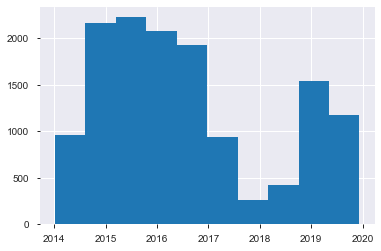

In [141]:
df.record_date.hist()

In [142]:
df.record_date.isna().sum()

7344

In [143]:
cond1 = ~(df.record_date.isna() &
          df.cancel_date.notna() & 
          df.reinstate_date.notna() & 
          (pd.to_datetime(df.cancel_date) > pd.to_datetime(df.reinstate_date)))
df.record_date = df.record_date.where(cond1, pd.to_datetime(df.cancel_date))

In [144]:
df.record_date.isna().sum()

7317

In [145]:
cond2 = ~(df.record_date.isna() &
          df.cancel_date.notna() & 
          df.reinstate_date.notna() & 
          (pd.to_datetime(df.cancel_date) <= pd.to_datetime(df.reinstate_date)))
df.record_date = df.record_date.where(cond2, pd.to_datetime(df.reinstate_date))
df.record_date.isna().sum()

7298

In [146]:
cond3 = ~(df.record_date.isna() & 
          df.cancel_date.notna() & 
          df.reinstate_date.isna())
df.record_date = df.record_date.where(cond3, pd.to_datetime(df.cancel_date))
df.record_date.isna().sum()

1988

In [147]:
cond4 = ~(df.record_date.isna() &
          df.cancel_date.isna() & 
          df.reinstate_date.notna())
df.record_date = df.record_date.where(cond4, pd.to_datetime(df.reinstate_date))
df.record_date.isna().sum()

1934

In [148]:
cond5 = ~(df.record_date.isna() &
          df.cancel_date.isna() & 
          df.reinstate_date.isna() &
          df.address_change_date.notna()
         )
df.record_date = df.record_date.where(cond5, pd.to_datetime(df.address_change_date))
df.record_date.isna().sum()

1094

In [149]:
import datetime

cond6 = ~(df.record_date.isna() &
          df.cancel_date.isna() & 
          df.reinstate_date.isna() &
          df.address_change_date.isna()
         )
df = df.assign(active_expiration_datetime = pd.to_datetime(df.active_expiration_date))
df.record_date = df.record_date.where(cond6, df.active_expiration_datetime - pd.DateOffset(years = 1))
df.record_date.isna().sum()

0

CREATE VARIABLES FOR ACTIVE INDIVIDUALS

1. ACTIVES AND PENDING AT 20.10.2019

In [150]:
df = df.assign(active_2019 = ((df.member_status == 'ACTIVE') | (df.member_status == 'PENDING')).astype('float64'))
pd.crosstab(df.active_2019, df.member_status)

member_status,ACTIVE,CANCELLED,PENDING
active_2019,,,
0.0,0,7886,0
1.0,11799,0,1358


2. ACTIVES AT 20.10.2018

In [151]:
df = df.assign(join_club_date_date = pd.to_datetime(df.join_club_date))
df = df.assign(reinstate_date_date = pd.to_datetime(df.reinstate_date))
df = df.assign(cancel_date_date = pd.to_datetime(df.cancel_date))

In [152]:
df = df.assign(active_2018 = 0)

In [153]:
cond1 = ~((df.join_club_date_date <= pd.Timestamp(2018, 10, 20)) &
          df.reinstate_date_date.isna() &
          df.cancel_date_date.isna()
         )
df.active_2018 = df.active_2018.where(cond1, 1)
df.active_2018.value_counts()

1    12822
0     8221
Name: active_2018, dtype: int64

In [154]:
cond2 = ~((df.join_club_date_date <= pd.Timestamp(2018, 10, 20)) &
          df.reinstate_date_date.isna() &
          (df.cancel_date_date > pd.Timestamp(2018, 10, 20))
         )
df.active_2018 = df.active_2018.where(cond2, 1)
df.active_2018.value_counts()

1    13385
0     7658
Name: active_2018, dtype: int64

In [155]:
cond3 = ~((df.join_club_date_date <= pd.Timestamp(2018, 10, 20)) &
          (df.reinstate_date_date <= pd.Timestamp(2018, 10, 20)) &
          (df.cancel_date_date.isna())
         )
df.active_2018 = df.active_2018.where(cond3, 1)
df.active_2018.value_counts()

1    13556
0     7487
Name: active_2018, dtype: int64

In [156]:
cond4 = ~((df.join_club_date_date <= pd.Timestamp(2018, 10, 20)) &
          (df.reinstate_date_date <= pd.Timestamp(2018, 10, 20)) &
          (df.cancel_date_date < df.reinstate_date_date)
         )
df.active_2018 = df.active_2018.where(cond4, 1)
df.active_2018.value_counts()

1    13559
0     7484
Name: active_2018, dtype: int64

In [157]:
cond5 = ~((df.join_club_date_date <= pd.Timestamp(2018, 10, 20)) &
          (df.reinstate_date_date <= pd.Timestamp(2018, 10, 20)) &
          (df.cancel_date_date >= df.reinstate_date_date) &
          (df.cancel_date_date > pd.Timestamp(2018, 10, 20))
         )
df.active_2018 = df.active_2018.where(cond5, 1)
df.active_2018.value_counts()

1    13622
0     7421
Name: active_2018, dtype: int64

In [158]:
cond6 = ~((df.join_club_date_date <= pd.Timestamp(2018, 10, 20)) &
          (df.reinstate_date_date > pd.Timestamp(2018, 10, 20)) &
          (df.cancel_date_date < df.reinstate_date_date) &
          (df.cancel_date_date > pd.Timestamp(2018, 10, 20))
         )
df.active_2018 = df.active_2018.where(cond6, 1)
df.active_2018.value_counts()

1    13627
0     7416
Name: active_2018, dtype: int64

REMOVE INACTIVE INDIVIDUALS

In [159]:
df_hh = df[['individual_key','active_2018','active_2019']].groupby('individual_key').agg({'active_2018': ['nunique', 'mean'], 'active_2019': ['nunique', 'mean']})
df_hh.tail()

active_2018      active_2019     
                   nunique mean     nunique mean
individual_key                                  
212310963.0              1  0.0           1  0.0
212312283.0              1  1.0           1  1.0
212317919.0              1  1.0           1  0.0
212320920.0              1  1.0           1  1.0
212321856.0              1  1.0           1  1.0

In [160]:
df_individuals_to_drop = df_hh[(df_hh['active_2018']['nunique'] == 1) & (df_hh['active_2018']['mean'] == 0) & 
      (df_hh['active_2019']['nunique'] == 1) & (df_hh['active_2019']['mean'] == 0)
     ].index
print(len(df_individuals_to_drop))
print(df.shape)
# cond = ~(df.individual_key.isin(df_individuals_to_drop))
df = df.drop(df[df.individual_key.isin(df_individuals_to_drop)].index)
# for i in df_individuals_to_drop:
#     df = df.drop(df[df.individual_key == i], axis = 0)
print(df.shape)

5667
(21043, 372)
(14069, 372)


AGGREGATION AT INDIVIDUAL LEVEL

In [161]:
df_agg_ind = df.groupby('individual_key').nunique()
df_agg_ind.tail()

,column1,individual_key,household_key,member_flag,city,state_-_grouped,zip5,zip9,fsv_cmsi_flag,fsv_credit_card_flag,...,was_towed_to_aar_referral_0.0,was_towed_to_aar_referral_1.0,was_towed_to_aar_referral_nan,record_date,active_expiration_datetime,active_2019,join_club_date_date,reinstate_date_date,cancel_date_date,active_2018
individual_key,,,,,,,,,,,,,,,,,,,,,
212310962.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,1
212312283.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,1
212317919.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
212320920.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,1
212321856.0,4,1,1,1,1,1,1,1,1,1,...,1,1,1,4,1,1,1,0,0,1


In [162]:
df_agg_ind.individual_key.value_counts(dropna = False)

1    6229
Name: individual_key, dtype: int64

In [163]:
df_agg_ind = df_agg_ind.drop('individual_key', axis = 1)
df_agg_ind.tail()

,column1,household_key,member_flag,city,state_-_grouped,zip5,zip9,fsv_cmsi_flag,fsv_credit_card_flag,fsv_deposit_program_flag,...,was_towed_to_aar_referral_0.0,was_towed_to_aar_referral_1.0,was_towed_to_aar_referral_nan,record_date,active_expiration_datetime,active_2019,join_club_date_date,reinstate_date_date,cancel_date_date,active_2018
individual_key,,,,,,,,,,,,,,,,,,,,,
212310962.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,1
212312283.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,1
212317919.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
212320920.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,1
212321856.0,4,1,1,1,1,1,1,1,1,1,...,1,1,1,4,1,1,1,0,0,1


In [164]:
# profil_agg_ind = df_agg_ind.profile_report().to_file(output_file = "C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA ind aggregated profile.html")

In [165]:
join_list = df_agg_ind[(df_agg_ind.active_2018 > 1)| (df_agg_ind.active_2019 > 1)].index
join_list

Float64Index([   327240.0,    371866.0,    397199.0,    399689.0,    437705.0,
                 474769.0,    518148.0,    528263.0,    579080.0,    643220.0,
              ...
              184234037.0, 184248266.0, 184268893.0, 184584932.0, 195247927.0,
              203735483.0, 204651225.0, 205734535.0, 212196842.0, 212251176.0],
             dtype='float64', name='individual_key', length=247)

In [166]:
df_join = df[df.individual_key.isin(join_list)][['individual_key','join_club_date_date','cancel_date_date','reinstate_date_date','active_2018','active_2019','sc_date']]
df_join_group = df_join.groupby('individual_key')

In [167]:
df_join_alloc = df_join[['individual_key', 'active_2018', 'active_2019']].groupby('individual_key').nunique()

In [168]:
df_join_alloc.active_2018.value_counts()

2    235
1     12
Name: active_2018, dtype: int64

In [169]:
df_join_alloc.active_2019.value_counts()

2    230
1     17
Name: active_2019, dtype: int64

In [170]:
df_hh = df[df.individual_key.isin(join_list)][['household_key','individual_key','active_2018','active_2019']].groupby('individual_key').agg({'household_key': 'mean', 'active_2018': ['nunique', 'mean'], 'active_2019': ['nunique', 'mean']})
df_hh_index = df_hh['household_key']
df_ind_count = df[df.household_key.isin(df_hh_index['mean'])][['household_key','individual_key']].groupby('household_key').nunique()
df_ind_count.individual_key.value_counts().sort_index()

1     59
2    107
3     38
4     21
5      5
6      3
7      2
Name: individual_key, dtype: int64

In [171]:
df_ind_count.tail()

,household_key,individual_key
household_key,,
93958654.0,1,1
96801235.0,1,1
99695958.0,1,2
99881116.0,1,4
99996562.0,1,3


In [172]:
df_hh_to_delete = df_ind_count[df_ind_count.individual_key == 1].index
df_hh_to_delete

Float64Index([  143890.0,   444621.0,   695689.0,   782211.0,   815190.0,
               1747077.0,  1810975.0,  2419007.0,  3335749.0,  3822550.0,
               4050425.0,  4422624.0,  4588415.0,  4918525.0,  5036564.0,
               5053612.0,  5082370.0,  5298304.0,  6617165.0,  6685179.0,
               6963648.0,  7131675.0,  7870595.0,  7947273.0,  8020753.0,
               8507998.0,  8719085.0,  9724951.0,  9753094.0, 10779918.0,
              10940770.0, 11061596.0, 11350457.0, 11543037.0, 12056213.0,
              12081364.0, 13552428.0, 14291550.0, 14605461.0, 14641985.0,
              14841161.0, 15527925.0, 16814566.0, 16863798.0, 17585525.0,
              17803221.0, 18103845.0, 18350440.0, 18353327.0, 18361312.0,
              19225740.0, 19285654.0, 37523264.0, 37578200.0, 37578247.0,
              56893079.0, 89308928.0, 93958654.0, 96801235.0],
             dtype='float64', name='household_key')

In [173]:
print(df.shape)
df = df.drop(df[df.household_key.isin(df_hh_to_delete)].index)
df.shape

(14069, 372)


(13788, 372)

In [174]:
df_agg_ind.active_2019.value_counts(dropna = False)

1    5999
2     230
Name: active_2019, dtype: int64

In [175]:
### REPEAT TO UPDATE THE LIST OF INDIVIDUAL KEYS TO CHECK

df_join = df[df.individual_key.isin(join_list)][['individual_key','join_club_date_date','cancel_date_date','reinstate_date_date','active_2018','active_2019','sc_date']]
df_join_alloc = df_join[['individual_key', 'active_2018', 'active_2019']].groupby('individual_key').nunique()
df_join_alloc_pb = df_join_alloc[(df_join_alloc.active_2018 > 1) | (df_join_alloc.active_2019 > 1)].index
len(df_join_alloc_pb)

188

In [202]:
# dict_2018 = {}
# dict_2019 = {}
# for i in df_join_alloc_pb:
#     print(df_join[df_join.individual_key == i])
#     if df_join_alloc.loc[i,'active_2018'] > 1:
#         active_2018_manual = int(input('Active in 2018, 1/0? '))
#         df_join_alloc.loc[i,'active_2018'] = active_2018_manual
#         dict_2018[i] = active_2018_manual
#     if df_join_alloc.loc[i,'active_2019'] > 1:
#         active_2019_manual = int(input('Active in 2019, 1/0? '))
#         df_join_alloc.loc[i,'active_2019'] = active_2019_manual
#         dict_2019[i] = active_2019_manual
# print(df_join_alloc.active_2018.value_counts())
# print(df_join_alloc.active_2019.value_counts())

       individual_key join_club_date_date cancel_date_date  \
16417        327240.0          1975-01-07              NaT   
16418        327240.0          1975-01-07              NaT   
16419        327240.0          1975-01-07              NaT   
16421        327240.0          1993-04-27       2002-08-13   

      reinstate_date_date  active_2018  active_2019           sc_date  
16417                 NaT            1          1.0  16/01/2019 00:00  
16418                 NaT            1          1.0  26/11/2018 00:00  
16419                 NaT            1          1.0  29/10/2018 00:00  
16421                 NaT            0          0.0               NaN  
Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
       individual_key join_club_date_date cancel_date_date  \
14573        371866.0          2010-06-14       2010-01-07   
14574        371866.0          2011-05-13              NaT   

      reinstate_date_date  active_2018  active_2019 sc_date  
14573                 NaT         

Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
      individual_key join_club_date_date cancel_date_date reinstate_date_date  \
3606       1656772.0          1970-01-11              NaT                 NaT   
3610       1656772.0          2000-05-06       2019-06-15                 NaT   

      active_2018  active_2019           sc_date  
3606            1          1.0  21/05/2015 00:00  
3610            1          0.0               NaN  
Active in 2019, 1/0? 1
      individual_key join_club_date_date cancel_date_date reinstate_date_date  \
9692       1893630.0          1973-01-02       2017-06-10                 NaT   
9693       1893630.0          1973-01-02       2017-06-10                 NaT   
9694       1893630.0          1973-01-02       2017-06-10                 NaT   
9695       1893630.0          1992-01-10              NaT                 NaT   
9696       1893630.0          1992-01-10              NaT                 NaT   
9697       1893630.0          1992-01-10        

Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
       individual_key join_club_date_date cancel_date_date  \
19693       2825495.0          1963-01-02              NaT   
19696       2825495.0          2004-12-05       2005-01-06   

      reinstate_date_date  active_2018  active_2019           sc_date  
19693                 NaT            1          1.0  29/04/2017 00:00  
19696                 NaT            0          0.0               NaN  
Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
       individual_key join_club_date_date cancel_date_date  \
11244       2833793.0          2015-12-01              NaT   
11245       2833793.0          2015-12-01              NaT   
11246       2833793.0          2015-12-01              NaT   
11247       2833793.0          2015-12-01              NaT   
11248       2833793.0          2015-12-01              NaT   
11249       2833793.0          2015-12-01              NaT   
11250       2833793.0          2015-12-01              NaT   
11251    

Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
      individual_key join_club_date_date cancel_date_date reinstate_date_date  \
1599       4137023.0          1972-01-07              NaT                 NaT   
1600       4137023.0          1972-01-07              NaT                 NaT   
1601       4137023.0          1972-01-07              NaT                 NaT   
1602       4137023.0          1972-01-07              NaT                 NaT   
1607       4137023.0          1998-02-12       2002-04-29                 NaT   

      active_2018  active_2019           sc_date  
1599            1          1.0  27/01/2019 00:00  
1600            1          1.0  04/08/2014 00:00  
1601            1          1.0  18/12/2014 00:00  
1602            1          1.0  19/08/2015 00:00  
1607            0          0.0               NaN  
Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
      individual_key join_club_date_date cancel_date_date reinstate_date_date  \
1324       4497216.0          1972

Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
      individual_key join_club_date_date cancel_date_date reinstate_date_date  \
6744       6807930.0          1999-08-04       2000-05-23                 NaT   
6745       6807930.0          2009-12-23              NaT                 NaT   
6746       6807930.0          2009-12-23              NaT                 NaT   

      active_2018  active_2019           sc_date  
6744            0          0.0               NaN  
6745            1          1.0  12/12/2014 00:00  
6746            1          1.0  01/10/2016 00:00  
Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
       individual_key join_club_date_date cancel_date_date  \
15350       7095577.0          1999-01-29              NaT   
15352       7095577.0          1971-01-02       2009-01-29   

      reinstate_date_date  active_2018  active_2019 sc_date  
15350          2017-09-17            1          1.0     NaN  
15352                 NaT            0          0.0     NaN  
Active

       individual_key join_club_date_date cancel_date_date  \
16023      10512736.0          2012-03-22       2019-07-10   
16024      10512736.0          2012-03-22       2019-07-10   
19568      10512736.0          1988-01-11       2012-03-22   

      reinstate_date_date  active_2018  active_2019           sc_date  
16023          2018-02-04            1          0.0  09/10/2018 00:00  
16024          2018-02-04            1          0.0  10/12/2016 00:00  
19568                 NaT            0          0.0               NaN  
Active in 2018, 1/0? 1
      individual_key join_club_date_date cancel_date_date reinstate_date_date  \
7767      11462475.0          2011-07-15       2011-07-15                 NaT   
7768      11462475.0          2011-07-15              NaT                 NaT   

      active_2018  active_2019           sc_date  
7767            0          0.0               NaN  
7768            1          1.0  13/02/2017 00:00  
Active in 2018, 1/0? 1
Active in 2019, 1/0?

Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
       individual_key join_club_date_date cancel_date_date  \
10106      13896090.0          1973-01-02       2016-08-12   
10107      13896090.0          1973-01-02       2016-08-12   
10108      13896090.0          1986-01-08              NaT   
10109      13896090.0          1986-01-08              NaT   

      reinstate_date_date  active_2018  active_2019           sc_date  
10106                 NaT            0          0.0  24/10/2016 00:00  
10107                 NaT            0          0.0  02/11/2016 00:00  
10108                 NaT            1          1.0  25/11/2018 00:00  
10109                 NaT            1          1.0  04/12/2016 00:00  
Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
       individual_key join_club_date_date cancel_date_date  \
20814      14008507.0          1989-01-02       2006-03-01   
20818      14008507.0          2005-07-26              NaT   
20819      14008507.0          2005-07-26          

Active in 2018, 1/0? 0
      individual_key join_club_date_date cancel_date_date reinstate_date_date  \
5033      17554043.0          2008-03-12       2011-12-20                 NaT   
5034      17554043.0          2012-07-19              NaT                 NaT   
5035      17554043.0          2012-07-19              NaT                 NaT   
5036      17554043.0          2012-07-19              NaT                 NaT   
5037      17554043.0          2012-07-19              NaT                 NaT   
5038      17554043.0          2012-07-19              NaT                 NaT   

      active_2018  active_2019           sc_date  
5033            0          0.0               NaN  
5034            1          1.0  14/12/2018 00:00  
5035            1          1.0  10/06/2014 00:00  
5036            1          1.0  30/01/2015 00:00  
5037            1          1.0  04/12/2014 00:00  
5038            1          1.0  17/10/2015 00:00  
Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
      

Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
      individual_key join_club_date_date cancel_date_date reinstate_date_date  \
5979      20598284.0          1966-01-12              NaT                 NaT   
5980      20598284.0          1966-01-12              NaT                 NaT   
5981      20598284.0          1966-01-12              NaT                 NaT   
5982      20598284.0          1966-01-12              NaT                 NaT   
5983      20598284.0          1966-01-12              NaT                 NaT   
5984      20598284.0          1966-01-12              NaT                 NaT   
5985      20598284.0          1966-01-12              NaT                 NaT   
5986      20598284.0          1984-11-17       2012-09-11                 NaT   

      active_2018  active_2019           sc_date  
5979            1          1.0  23/06/2014 00:00  
5980            1          1.0  06/02/2015 00:00  
5981            1          1.0  03/06/2015 00:00  
5982            1   

Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
       individual_key join_club_date_date cancel_date_date  \
10329      22366123.0          1973-01-03              NaT   
10330      22366123.0          1973-01-03              NaT   
10331      22366123.0          1973-01-03              NaT   
10332      22366123.0          1973-01-03              NaT   
10333      22366123.0          1973-01-03              NaT   
10334      22366123.0          1973-01-03              NaT   
10336      22366123.0          1999-04-20       2001-01-02   

      reinstate_date_date  active_2018  active_2019           sc_date  
10329                 NaT            1          1.0  12/11/2018 00:00  
10330                 NaT            1          1.0  08/03/2015 00:00  
10331                 NaT            1          1.0  21/09/2015 00:00  
10332                 NaT            1          1.0  29/10/2015 00:00  
10333                 NaT            1          1.0  18/11/2015 00:00  
10334                 NaT

Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
      individual_key join_club_date_date cancel_date_date reinstate_date_date  \
6378      24871049.0          2013-06-24              NaT                 NaT   
6379      24871049.0          2013-06-24              NaT                 NaT   
6380      24871049.0          2013-06-24              NaT                 NaT   
6381      24871049.0          2013-06-24              NaT                 NaT   
6382      24871049.0          2003-07-28       2008-02-08                 NaT   

      active_2018  active_2019           sc_date  
6378            1          1.0  14/11/2018 00:00  
6379            1          1.0  08/01/2019 00:00  
6380            1          1.0  17/06/2015 00:00  
6381            1          1.0  05/09/2016 00:00  
6382            0          0.0               NaN  
Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
       individual_key join_club_date_date cancel_date_date  \
18378      24975262.0          1999-11-08       2004-

Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
       individual_key join_club_date_date cancel_date_date  \
16455      27367598.0          2001-03-04       2012-01-05   
16458      27367598.0          2012-12-14              NaT   

      reinstate_date_date  active_2018  active_2019           sc_date  
16455                 NaT            0          0.0               NaN  
16458                 NaT            1          1.0  07/05/2016 00:00  
Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
       individual_key join_club_date_date cancel_date_date  \
14094      27438155.0          2006-01-06       2007-06-15   
14099      27438155.0          2007-10-19              NaT   

      reinstate_date_date  active_2018  active_2019 sc_date  
14094                 NaT            0          0.0     NaN  
14099                 NaT            1          1.0     NaN  
Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
      individual_key join_club_date_date cancel_date_date reinstate_date_date  \
8047 

Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
      individual_key join_club_date_date cancel_date_date reinstate_date_date  \
8370      30134707.0          2003-10-01              NaT                 NaT   
8372      30134707.0          1999-05-10       2000-11-12                 NaT   

      active_2018  active_2019           sc_date  
8370            1          1.0  26/10/2015 00:00  
8372            0          0.0               NaN  
Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
       individual_key join_club_date_date cancel_date_date  \
13023      30170209.0          1970-01-01              NaT   
13026      30170209.0          2006-12-09       2010-02-06   
13028      30170209.0          2010-09-26       2011-09-12   

      reinstate_date_date  active_2018  active_2019           sc_date  
13023                 NaT            1          1.0  04/05/2015 00:00  
13026                 NaT            0          0.0               NaN  
13028                 NaT            0        

Active in 2019, 1/0? 1
      individual_key join_club_date_date cancel_date_date reinstate_date_date  \
2634      32693562.0          1997-12-23       2006-01-06                 NaT   
2635      32693562.0          2006-02-02              NaT                 NaT   
2636      32693562.0          2006-02-02              NaT                 NaT   
2637      32693562.0          2006-02-02              NaT                 NaT   
2638      32693562.0          2006-02-02              NaT                 NaT   
2639      32693562.0          2006-02-02              NaT                 NaT   
2640      32693562.0          2006-02-02              NaT                 NaT   
2641      32693562.0          2006-02-02              NaT                 NaT   
2642      32693562.0          2006-02-02              NaT                 NaT   
2643      32693562.0          2006-02-02              NaT                 NaT   
2644      32693562.0          2006-02-02              NaT                 NaT   
2645 

Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
       individual_key join_club_date_date cancel_date_date  \
14383     170890066.0          1978-01-11              NaT   
14384     170890066.0          1971-01-11       2010-09-30   

      reinstate_date_date  active_2018  active_2019 sc_date  
14383                 NaT            1          1.0     NaN  
14384                 NaT            0          0.0     NaN  
Active in 2018, 1/0? 0
Active in 2019, 1/0? 0
       individual_key join_club_date_date cancel_date_date  \
16565     184224357.0          2007-11-16              NaT   
16566     184224357.0          2004-08-26       2007-11-16   

      reinstate_date_date  active_2018  active_2019           sc_date  
16565                 NaT            1          1.0  22/08/2016 00:00  
16566                 NaT            0          0.0               NaN  
Active in 2018, 1/0? 1
Active in 2019, 1/0? 1
     individual_key join_club_date_date cancel_date_date reinstate_date_date  \
233   

In [ ]:
DON'T RUN TWO NEXT CELLS!

In [ ]:
### DON'T RUN THIS CELL!

dict_2018

In [204]:
### DON'T RUN THIS CELL!

dict_2019

{327240.0: 1,
 371866.0: 1,
 397199.0: 1,
 474769.0: 1,
 518148.0: 0,
 528263.0: 1,
 579080.0: 1,
 678374.0: 1,
 678375.0: 1,
 940904.0: 1,
 1426276.0: 1,
 1426420.0: 1,
 1600966.0: 1,
 1656772.0: 1,
 1893630.0: 1,
 2065427.0: 1,
 2361818.0: 1,
 2446370.0: 0,
 2627041.0: 1,
 2649680.0: 1,
 2650863.0: 0,
 2766868.0: 1,
 2768201.0: 1,
 2825495.0: 1,
 2833793.0: 1,
 2833794.0: 1,
 2940718.0: 1,
 3133527.0: 1,
 3661086.0: 1,
 3761832.0: 1,
 3886156.0: 1,
 4137023.0: 1,
 4497216.0: 1,
 4626883.0: 1,
 4952103.0: 1,
 5552415.0: 1,
 5716968.0: 1,
 5764223.0: 0,
 5828531.0: 1,
 5873683.0: 0,
 6016675.0: 1,
 6114819.0: 1,
 6114820.0: 1,
 6463287.0: 1,
 6807930.0: 1,
 7095577.0: 0,
 7432987.0: 1,
 8002886.0: 1,
 8185881.0: 1,
 8284348.0: 1,
 8354692.0: 1,
 8567656.0: 0,
 9078643.0: 1,
 9517682.0: 1,
 9703052.0: 0,
 9944667.0: 1,
 10053864.0: 1,
 10381842.0: 0,
 11462475.0: 1,
 11813833.0: 0,
 12181833.0: 1,
 12207679.0: 1,
 12354409.0: 0,
 13041943.0: 1,
 13059147.0: 1,
 13106579.0: 1,
 13231107.

In [192]:
dict_2018 = {327240.0: 1,
             371866.0: 1,
             397199.0: 1,
             474769.0: 1,
             518148.0: 0,
             528263.0: 1,
             579080.0: 1,
             678374.0: 1,
             678375.0: 1,
             940904.0: 1,
             1426276.0: 1,
             1426420.0: 1,
             1600966.0: 1,
             1893630.0: 1,
             2065427.0: 1,
             2361818.0: 1,
             2446370.0: 0,
             2614347.0: 1,
             2627041.0: 1,
             2649680.0: 1,
             2650863.0: 0,
             2766868.0: 1,
             2768201.0: 1,
             2825495.0: 1,
             2833793.0: 1,
             2833794.0: 1,
             2940718.0: 1,
             3133527.0: 1,
             3661086.0: 1,
             3761832.0: 1,
             3843552.0: 1,
             3886156.0: 1,
             4137023.0: 1,
             4497216.0: 1,
             4626883.0: 1,
             4952103.0: 1,
             5552415.0: 1,
             5716968.0: 1,
             5764223.0: 0,
             5828531.0: 1,
             5873683.0: 0,
             6016675.0: 1,
             6114819.0: 1,
             6114820.0: 1,
             6463287.0: 1,
             6807930.0: 1,
             7095577.0: 0,
             8002886.0: 1,
             8185881.0: 1,
             8284348.0: 1,
             8354692.0: 1,
             8567656.0: 0,
             9078643.0: 1,
             9517682.0: 1,
             9703052.0: 0,
             9944667.0: 1,
             10053864.0: 1,
             10381842.0: 0,
             10512736.0: 1,
             11462475.0: 1,
             11783533.0: 1,
             11813833.0: 0,
             12181833.0: 1,
             12906478.0: 1,
             13041943.0: 1,
             13059147.0: 1,
             13106579.0: 1,
             13231107.0: 1,
             13896090.0: 1,
             14008507.0: 1,
             14765467.0: 1,
             14780617.0: 1,
             15036818.0: 1,
             15428242.0: 1,
             15589789.0: 1,
             16262348.0: 1,
             16660582.0: 1,
             16756769.0: 1,
             16825767.0: 1,
             17366861.0: 1,
             17460461.0: 0,
             17554043.0: 1,
             17555979.0: 1,
             17695312.0: 1,
             18598389.0: 1,
             18942097.0: 1,
             19098331.0: 1,
             19396424.0: 1,
             19686822.0: 0,
             20282214.0: 1,
             20282215.0: 1,
             20301754.0: 0,
             20594638.0: 1,
             20598284.0: 1,
             20671591.0: 1,
             20790086.0: 0,
             20963828.0: 1,
             21219773.0: 1,
             21377024.0: 1,
             21421174.0: 1,
             21421176.0: 1,
             21421177.0: 1,
             21422986.0: 1,
             21687506.0: 1,
             21821420.0: 0,
             22017123.0: 1,
             22143751.0: 1,
             22198546.0: 1,
             22366123.0: 1,
             22428676.0: 1,
             22689431.0: 1,
             23095642.0: 1,
             23415794.0: 1,
             23541766.0: 1,
             23605418.0: 1,
             23681690.0: 1,
             23756294.0: 1,
             23890622.0: 0,
             24062245.0: 1,
             24070164.0: 1,
             24638019.0: 1,
             24714918.0: 1,
             24871049.0: 1,
             24975262.0: 1,
             25145104.0: 1,
             25145106.0: 1,
             25510098.0: 1,
             25598950.0: 1,
             25611489.0: 1,
             26752093.0: 1,
             26795029.0: 1,
             26905896.0: 1,
             27008322.0: 1,
             27008323.0: 0,
             27271195.0: 1,
             27271196.0: 1,
             27367596.0: 1,
             27367598.0: 1,
             27438155.0: 1,
             27534763.0: 1,
             27657799.0: 1,
             27657801.0: 1,
             27700448.0: 0,
             27851153.0: 1,
             28592983.0: 1,
             28629464.0: 1,
             28900294.0: 1,
             29184473.0: 1,
             30134707.0: 1,
             30170209.0: 1,
             30250103.0: 0,
             30429436.0: 1,
             30460961.0: 1,
             30507467.0: 1,
             30539508.0: 1,
             31232911.0: 1,
             31277075.0: 1,
             31477754.0: 1,
             31901025.0: 0,
             32077401.0: 1,
             32324908.0: 1,
             32693562.0: 1,
             32751865.0: 1,
             32966867.0: 1,
             43390726.0: 0,
             52236719.0: 1,
             52360073.0: 1,
             52858339.0: 1,
             56173098.0: 1,
             56271089.0: 1,
             56384219.0: 1,
             56394192.0: 1,
             107694047.0: 1,
             170889880.0: 1,
             170890066.0: 0,
             184224357.0: 1,
             184234037.0: 1,
             184248266.0: 1,
             184584932.0: 1,
             203735483.0: 0,
             205734535.0: 1,
             212196842.0: 1
            }

In [193]:
dict_2019 = {327240.0: 1,
             371866.0: 1,
             397199.0: 1,
             474769.0: 1,
             518148.0: 0,
             528263.0: 1,
             579080.0: 1,
             678374.0: 1,
             678375.0: 1,
             940904.0: 1,
             1426276.0: 1,
             1426420.0: 1,
             1600966.0: 1,
             1656772.0: 1,
             1893630.0: 1,
             2065427.0: 1,
             2361818.0: 1,
             2446370.0: 0,
             2627041.0: 1,
             2649680.0: 1,
             2650863.0: 0,
             2766868.0: 1,
             2768201.0: 1,
             2825495.0: 1,
             2833793.0: 1,
             2833794.0: 1,
             2940718.0: 1,
             3133527.0: 1,
             3661086.0: 1,
             3761832.0: 1,
             3886156.0: 1,
             4137023.0: 1,
             4497216.0: 1,
             4626883.0: 1,
             4952103.0: 1,
             5552415.0: 1,
             5716968.0: 1,
             5764223.0: 0,
             5828531.0: 1,
             5873683.0: 0,
             6016675.0: 1,
             6114819.0: 1,
             6114820.0: 1,
             6463287.0: 1,
             6807930.0: 1,
             7095577.0: 0,
             7432987.0: 1,
             8002886.0: 1,
             8185881.0: 1,
             8284348.0: 1,
             8354692.0: 1,
             8567656.0: 0,
             9078643.0: 1,
             9517682.0: 1,
             9703052.0: 0,
             9944667.0: 1,
             10053864.0: 1,
             10381842.0: 0,
             11462475.0: 1,
             11813833.0: 0,
             12181833.0: 1,
             12207679.0: 1,
             12354409.0: 0,
             13041943.0: 1,
             13059147.0: 1,
             13106579.0: 1,
             13231107.0: 1,
             13896090.0: 1,
             14008507.0: 1,
             14549324.0: 1,
             14765467.0: 1,
             14780617.0: 1,
             15036818.0: 1,
             15428242.0: 1,
             15589789.0: 1,
             16262348.0: 1,
             16660582.0: 1,
             16825767.0: 1,
             17366861.0: 1,
             17554043.0: 1,
             17555979.0: 1,
             17695312.0: 1,
             18598389.0: 1,
             18942097.0: 1,
             19396424.0: 1,
             19686822.0: 0,
             20282214.0: 1,
             20282215.0: 1,
             20301754.0: 0,
             20594638.0: 1,
             20598284.0: 1,
             20671591.0: 1,
             20790086.0: 0,
             20963828.0: 1,
             21219773.0: 1,
             21377024.0: 1,
             21421174.0: 1,
             21421176.0: 1,
             21421177.0: 1,
             21422986.0: 1,
             21687506.0: 1,
             21821420.0: 0,
             22017123.0: 1,
             22143751.0: 1,
             22198546.0: 1,
             22366123.0: 1,
             22428676.0: 1,
             22689431.0: 1,
             23415794.0: 1,
             23541766.0: 1,
             23605418.0: 1,
             23681690.0: 1,
             23756294.0: 1,
             23890622.0: 0,
             24062245.0: 1,
             24638019.0: 1,
             24714918.0: 1,
             24871049.0: 1,
             24975262.0: 1,
             25145106.0: 1,
             25510098.0: 1,
             25598950.0: 1,
             25611489.0: 1,
             26795029.0: 1,
             26905896.0: 1,
             27008322.0: 1,
             27008323.0: 0,
             27271195.0: 1,
             27271196.0: 1,
             27367596.0: 1,
             27367598.0: 1,
             27438155.0: 1,
             27534763.0: 1,
             27657799.0: 1,
             27657801.0: 1,
             27700448.0: 0,
             27851153.0: 1,
             28592983.0: 1,
             28629464.0: 1,
             28900294.0: 1,
             29184473.0: 1,
             30134707.0: 1,
             30170209.0: 1,
             30429436.0: 1,
             30460961.0: 1,
             30507467.0: 1,
             30539508.0: 1,
             31277075.0: 1,
             31477754.0: 1,
             31901025.0: 0,
             32077401.0: 1,
             32324908.0: 1,
             32693562.0: 1,
             32751865.0: 1,
             32966867.0: 1,
             43390726.0: 0,
             52236719.0: 1,
             52360073.0: 1,
             52858339.0: 1,
             56173098.0: 1,
             56271089.0: 1,
             56384219.0: 1,
             56394192.0: 1,
             107694047.0: 1,
             170889880.0: 1,
             170890066.0: 0,
             184224357.0: 1,
             184234037.0: 1,
             184248266.0: 1,
             184584932.0: 1,
             195247927.0: 0,
             203735483.0: 0,
             205734535.0: 1,
             212196842.0: 1
            }

In [194]:
for i in dict_2018:
    df.loc[df.individual_key == i,'active_2018'] = dict_2018[i]
for i in dict_2019:
    df.loc[df.individual_key == i,'active_2019'] = dict_2019[i]

In [195]:
print(df.shape)
df = df.drop(df[(df.active_2018 == 0) & (df.active_2019 == 0)].index)
print(df.shape)

(13577, 372)
(13555, 372)


In [196]:
df_temp = df[['individual_key','active_2018','active_2019']].groupby('individual_key').nunique()

In [197]:
df_temp.active_2018.value_counts(dropna = False)

1    6148
Name: active_2018, dtype: int64

In [198]:
df_temp.active_2019.value_counts(dropna = False)

1    6148
Name: active_2019, dtype: int64

In [199]:
df_agg_ind.join_club_date_date.value_counts(dropna = False)

1    5973
2     246
3       9
4       1
Name: join_club_date_date, dtype: int64

In [200]:
df_agg_ind.member_tenure_years.value_counts()

1    5987
2     236
3       5
4       1
Name: member_tenure_years, dtype: int64

In [201]:
df_agg_ind.birth_year.value_counts()

1    6112
2     115
3       2
Name: birth_year, dtype: int64

In [203]:
wrong_birth_list

Float64Index([   399689.0,    437705.0,    474769.0,    528263.0,    891736.0,
                1342121.0,   1656772.0,   2031402.0,   2361818.0,   2404981.0,
              ...
               32966867.0,  43447247.0,  52360073.0,  56271089.0, 170890066.0,
              170908403.0, 170943851.0, 184234037.0, 184268893.0, 204651225.0],
             dtype='float64', name='individual_key', length=117)

In [205]:
len(wrong_birth_list)

117

In [232]:
# dict_age = {}
# for i in wrong_birth_list:
#     print(df_wrong_birth[df_wrong_birth.individual_key == i])
#     age_fix = int(input('What birth year? '))
#     df_wrong_birth.loc[df_wrong_birth.individual_key == i,'birth_year'] = age_fix
#     df.loc[df.individual_key == i,'birth_year'] = age_fix
#     dict_age[i] = age_fix
# print(df_wrong_birth.birth_year.value_counts().sort_index)

       individual_key  birth_year_missing  birth_year birth_date_mmddyyyy  \
20857        474769.0                   1      1955.0                 NaN   
20862        474769.0                   1      1955.0                 NaN   
20863        474769.0                   1      1955.0                 NaN   

      date_of_birth  
20857           NaN  
20862           NaN  
20863           NaN  
What birth year? 1955
      individual_key  birth_year_missing  birth_year birth_date_mmddyyyy  \
9421        528263.0                   1      1974.0                 NaN   
9422        528263.0                   0      1959.0    01/01/1959 00:00   
9423        528263.0                   0      1959.0    01/01/1959 00:00   
9424        528263.0                   0      1959.0    01/01/1959 00:00   
9425        528263.0                   0      1959.0    01/01/1959 00:00   
9426        528263.0                   0      1959.0    01/01/1959 00:00   
9427        528263.0                   0      195

What birth year? 1940
      individual_key  birth_year_missing  birth_year birth_date_mmddyyyy  \
1599       4137023.0                   0      1948.0    31/08/1948 00:00   
1600       4137023.0                   0      1948.0    31/08/1948 00:00   
1601       4137023.0                   0      1948.0    31/08/1948 00:00   
1602       4137023.0                   0      1948.0    31/08/1948 00:00   
1607       4137023.0                   1      1963.0                 NaN   

     date_of_birth  
1599           NaN  
1600           NaN  
1601           NaN  
1602           NaN  
1607           NaN  
What birth year? 1948
      individual_key  birth_year_missing  birth_year birth_date_mmddyyyy  \
7879       4626883.0                   1      1962.0                 NaN   
7880       4626883.0                   1      1937.0                 NaN   

     date_of_birth  
7879           NaN  
7880           NaN  
What birth year? 1962
       individual_key  birth_year_missing  birth_year birth

What birth year? 1972
       individual_key  birth_year_missing  birth_year birth_date_mmddyyyy  \
20814      14008507.0                   1      1954.0                 NaN   
20818      14008507.0                   0      1979.0    30/05/1979 00:00   
20819      14008507.0                   0      1979.0    30/05/1979 00:00   
20820      14008507.0                   0      1979.0    30/05/1979 00:00   

      date_of_birth  
20814           NaN  
20818           NaN  
20819           NaN  
20820           NaN  
What birth year? 1979
      individual_key  birth_year_missing  birth_year birth_date_mmddyyyy  \
9801      14780617.0                   1      1967.0                 NaN   
9802      14780617.0                   1      1967.0                 NaN   
9803      14780617.0                   1      1967.0                 NaN   
9805      14780617.0                   1      1963.0                 NaN   

     date_of_birth  
9801           NaN  
9802           NaN  
9803           N

What birth year? 1942
      individual_key  birth_year_missing  birth_year birth_date_mmddyyyy  \
7226      22689431.0                   1      1978.0                 NaN   
7229      22689431.0                   0      1977.0    14/09/1977 00:00   

     date_of_birth  
7226           NaN  
7229           NaN  
What birth year? 1977
       individual_key  birth_year_missing  birth_year birth_date_mmddyyyy  \
19123      24070164.0                   1      1928.0                 NaN   
19124      24070164.0                   0      1961.0    03/05/1961 00:00   
19125      24070164.0                   0      1961.0    03/05/1961 00:00   

      date_of_birth  
19123           NaN  
19124           NaN  
19125           NaN  
What birth year? 1961
       individual_key  birth_year_missing  birth_year birth_date_mmddyyyy  \
16763      24714918.0                   1      1940.0                 NaN   
16764      24714918.0                   0      1988.0    01/05/1988 00:00   
16765      247

What birth year? 1979
       individual_key  birth_year_missing  birth_year birth_date_mmddyyyy  \
10120      28900294.0                   0      1946.0    04/09/1946 00:00   
10121      28900294.0                   1      1972.0                 NaN   

      date_of_birth  
10120           NaN  
10121           NaN  
What birth year? 1946
       individual_key  birth_year_missing  birth_year birth_date_mmddyyyy  \
15769      29184473.0                   1      1958.0                 NaN   
15770      29184473.0                   0      1972.0    14/06/1972 00:00   

      date_of_birth  
15769           NaN  
15770           NaN  
What birth year? 1972
       individual_key  birth_year_missing  birth_year birth_date_mmddyyyy  \
16174      30126851.0                   0      1948.0    21/06/1948 00:00   
16181      30126851.0                   0      1975.0    06/07/1975 00:00   

      date_of_birth  
16174           NaN  
16181           NaN  
What birth year? 1948
       individual_

In [ ]:
DO NOT TOUCH THE NEXT CELL!

In [241]:
dict_age

{474769.0: 1955,
 528263.0: 1959,
 1656772.0: 1946,
 2031402.0: 1991,
 2361818.0: 1975,
 2614347.0: 1941,
 2768201.0: 1957,
 2825495.0: 1950,
 2833793.0: 1985,
 2940718.0: 1983,
 3661086.0: 1943,
 3761832.0: 1988,
 3886156.0: 1940,
 4137023.0: 1948,
 4626883.0: 1962,
 5409981.0: 1982,
 5552415.0: 1964,
 5716968.0: 1949,
 6114820.0: 1965,
 7095577.0: 1950,
 8085407.0: 1976,
 8185881.0: 1954,
 8567656.0: 1943,
 9517682.0: 1934,
 9944667.0: 1944,
 10064944.0: 1936,
 10512736.0: 1932,
 11462475.0: 1993,
 12181833.0: 1943,
 12207679.0: 1972,
 14008507.0: 1979,
 14780617.0: 1967,
 15779476.0: 1942,
 16756769.0: 1989,
 17366861.0: 1942,
 17460461.0: 1945,
 17554043.0: 1978,
 17695312.0: 1955,
 18598389.0: 1993,
 18942097.0: 1949,
 20301754.0: 1979,
 20790086.0: 1931,
 20963828.0: 1958,
 21377024.0: 1964,
 21687506.0: 1978,
 22017123.0: 1936,
 22143751.0: 1964,
 22198546.0: 1972,
 22366123.0: 1942,
 22689431.0: 1977,
 24070164.0: 1961,
 24714918.0: 1988,
 24765858.0: 1943,
 24871049.0: 1954,
 

In [206]:
dict_age = {474769.0: 1955,
            528263.0: 1959,
            1656772.0: 1946,
            2031402.0: 1991,
            2361818.0: 1975,
            2614347.0: 1941,
            2768201.0: 1957,
            2825495.0: 1950,
            2833793.0: 1985,
            2940718.0: 1983,
            3661086.0: 1943,
            3761832.0: 1988,
            3886156.0: 1940,
            4137023.0: 1948,
            4626883.0: 1962,
            5409981.0: 1982,
            5552415.0: 1964,
            5716968.0: 1949,
            6114820.0: 1965,
            7095577.0: 1950,
            8085407.0: 1976,
            8185881.0: 1954,
            8567656.0: 1943,
            9517682.0: 1934,
            9944667.0: 1944,
            10064944.0: 1936,
            10512736.0: 1932,
            11462475.0: 1993,
            12181833.0: 1943,
            12207679.0: 1972,
            14008507.0: 1979,
            14780617.0: 1967,
            15779476.0: 1942,
            16756769.0: 1989,
            17366861.0: 1942,
            17460461.0: 1945,
            17554043.0: 1978,
            17695312.0: 1955,
            18598389.0: 1993,
            18942097.0: 1949,
            20301754.0: 1979,
            20790086.0: 1931,
            20963828.0: 1958,
            21377024.0: 1964,
            21687506.0: 1978,
            22017123.0: 1936,
            22143751.0: 1964,
            22198546.0: 1972,
            22366123.0: 1942,
            22689431.0: 1977,
            24070164.0: 1961,
            24714918.0: 1988,
            24765858.0: 1943,
            24871049.0: 1954,
            25145104.0: 1978,
            25145106.0: 1984,
            25510098.0: 1993,
            25611489.0: 1964,
            26752093.0: 1954,
            26905896.0: 1939,
            27008322.0: 1972,
            27271196.0: 1936,
            27367596.0: 1976,
            27438155.0: 1987,
            27657801.0: 1983,
            27700448.0: 1952,
            27851153.0: 1939,
            28592983.0: 1979,
            28900294.0: 1946,
            29184473.0: 1972,
            30126851.0: 1948,
            30170209.0: 1948,
            30250103.0: 1981,
            30460961.0: 1950,
            30507467.0: 1968,
            30986637.0: 1972,
            31277075.0: 1959,
            31901025.0: 1942,
            32751865.0: 1980,
            32966867.0: 1930,
            52360073.0: 1940,
            56271089.0: 1940,
            170890066.0: 1959,
            184234037.0: 1953
           }

In [207]:
for i in dict_age:
    df.loc[df.individual_key == i,'birth_year'] = dict_age[i]

In [208]:
df_temp = df[['individual_key','birth_year']].groupby('individual_key').nunique()
df_temp.birth_year.value_counts(dropna = False)

1    6148
Name: birth_year, dtype: int64

In [209]:
df = df.assign(age_2018 = 2018 - df.birth_year)
df.age_2018.isna().sum()

0

In [210]:
df = df.assign(age_2018_primary = df.age_2018 * df.member_primary)
df.age_2018_primary.isna().sum()

0

In [211]:
df = df.assign(occupation_grouped_primary = df.occupation_group_grouped)
df.loc[df.member_primary == 0, 'occupation_grouped_primary'] = 0
df.occupation_grouped_primary.isna().sum()
pd.crosstab(df.occupation_grouped_primary, df.member_primary)

member_primary,0.0,1.0
occupation_grouped_primary,,
0,5452,0
Blue Collar - Inferred,0,137
Blue Collar - Known,0,138
Management - Inferred,0,150
Management - Known,0,404
Office Administration - Inferred,0,98
Office Administration - Known,0,134
Other - Inferred,0,197
Other - Known,0,112


In [212]:
print(df.shape)
df_temp = pd.get_dummies(df.occupation_grouped_primary, prefix = 'occupation_primary', dummy_na = True)
df_temp.sum(axis=0)
most_frequent_cat = df_temp.sum(axis=0)[df_temp.sum(axis=0) == max(df_temp.sum(axis=0))].index.values
most_frequent_cats_dict['occupation_primary'] = most_frequent_cat[0]
df_temp.columns = [name.lower().replace(' ', '_') for name in df_temp.columns]
df = pd.concat([df, df_temp], axis=1)
print(df.shape)

(13555, 375)
(13555, 392)


In [214]:
df = df.assign(kcl_primary = df.kcl_grouped)
df.loc[df.member_primary == 0, 'kcl_primary'] = 0
print(df.kcl_primary.isna().sum())
print(pd.crosstab(df.kcl_primary, df.member_primary))
print(df.shape)
df_temp = pd.get_dummies(df.kcl_primary, prefix = 'kcl_primary', dummy_na = True)
most_frequent_cat = df_temp.sum(axis=0)[df_temp.sum(axis=0) == max(df_temp.sum(axis=0))].index.values
most_frequent_cats_dict['kcl_primary'] = most_frequent_cat[0]
df_temp.columns = [name.lower().replace(' ', '_') for name in df_temp.columns]
df = pd.concat([df, df_temp], axis=1)
print(df.shape)

1993
member_primary             0.0   1.0
kcl_primary                         
0                         5452     0
Autumn Years                 0  1305
Blue Sky Boomers             0   453
Booming with Confidence      0   916
Cultural Connections         0    54
Economic Challenges          0    37
Family Union                 0   215
Flourishing Families         0   143
Golden Year Guardians        0  1080
Middle Class Melting Pot     0   185
Other                        0    42
Power Elite                  0   311
Promising Families           0    81
Significant Singles          0   134
Singles and Starters         0   232
Surburban Style              0   292
Thriving Boomers             0   574
Young City Solos             0    56
(13555, 393)
(13555, 412)


In [215]:
df = df.assign(mosaic_primary = df.mosaic_global_household)
df.loc[df.member_primary == 0, 'mosaic_primary'] = 0
print(df.mosaic_primary.isna().sum())
print(pd.crosstab(df.mosaic_primary, df.member_primary))
print(df.shape)
df_temp = pd.get_dummies(df.mosaic_primary, prefix = 'mosaic_primary', dummy_na = True)
most_frequent_cat = df_temp.sum(axis=0)[df_temp.sum(axis=0) == max(df_temp.sum(axis=0))].index.values
most_frequent_cats_dict['mosaic_primary'] = most_frequent_cat[0]
df_temp.columns = [name.lower().replace(' ', '_') for name in df_temp.columns]
df = pd.concat([df, df_temp], axis=1)
print(df.shape)

1993
member_primary              0.0   1.0
mosaic_primary                       
0                          5452     0
Bourgeois Prosperity          0  1324
Career and Family             0   331
Comfortable Retirement        0  2117
Hard Working Blue Collar      0   437
Low Income Elders             0   314
Metropolitan Strugglers       0   223
Post Industrial Survivors     0   429
Routine Service Workers       0   855
Rural Inheritance             0     2
Sophisticated Singles         0    78
(13555, 413)
(13555, 425)


In [216]:
df.mosaic_global_household.value_counts(dropna = False)

Comfortable Retirement       3348
NaN                          3121
Bourgeois Prosperity         2415
Routine Service Workers      1701
Career and Family             796
Hard Working Blue Collar      778
Post Industrial Survivors     618
Low Income Elders             367
Metropolitan Strugglers       309
Sophisticated Singles          98
Rural Inheritance               4
Name: mosaic_global_household, dtype: int64

In [217]:
df = df.assign(language_primary = df.language_grouped)
df.loc[df.member_primary == 0, 'language_primary'] = 0
print(df.language_primary.isna().sum())
print(pd.crosstab(df.language_primary, df.member_primary))
print(df.shape)
df_temp = pd.get_dummies(df.language_primary, prefix = 'language_primary', dummy_na = True)
most_frequent_cat = df_temp.sum(axis=0)[df_temp.sum(axis=0) == max(df_temp.sum(axis=0))].index.values
most_frequent_cats_dict['language_primary'] = most_frequent_cat[0]
df_temp.columns = [name.lower().replace(' ', '_') for name in df_temp.columns]
df = pd.concat([df, df_temp], axis=1)
print(df.shape)

1914
member_primary     0.0   1.0
language_primary            
0                 5452     0
English              0  5649
Other                0   166
Unknown              0   374
(13555, 426)
(13555, 431)


In [218]:
df = df.assign(race_primary = df.race_grouped)
df.loc[df.member_primary == 0, 'race_primary'] = 0
print(df.race_primary.isna().sum())
print(pd.crosstab(df.race_primary, df.member_primary))
print(df.shape)
df_temp = pd.get_dummies(df.race_primary, prefix = 'race_primary', dummy_na = True)
most_frequent_cat = df_temp.sum(axis=0)[df_temp.sum(axis=0) == max(df_temp.sum(axis=0))].index.values
most_frequent_cats_dict['race_primary'] = most_frequent_cat[0]
df_temp.columns = [name.lower().replace(' ', '_') for name in df_temp.columns]
df = pd.concat([df, df_temp], axis=1)
print(df.shape)

1914
member_primary                           0.0   1.0
race_primary                                      
0                                       5452     0
Asian                                      0    85
Caucasion / White - Eastern European       0   184
Caucasion / White - English                0  1490
Caucasion / White - European               0  2781
Caucasion / White - Jewish                 0    57
Caucasion / White - Unknown                0   236
Caucasion / White - White Non-American     0   566
Hispanic - Hispanic Origin                 0   199
Hispanic - Portuguese Origin               0   157
Middle Eastern                             0   255
Other                                      0    26
Unknown                                    0   153
(13555, 432)
(13555, 446)


In [227]:
df = df.assign(gender_primary = df.gender_grouped)
df.loc[df.member_primary == 0, 'gender_primary'] = 0
print(df.gender_primary.isna().sum())
print(pd.crosstab(df.gender_primary, df.member_primary))
print(df.shape)
df_temp = pd.get_dummies(df.gender_primary, prefix = 'gender_primary', dummy_na = True)
most_frequent_cat = df_temp.sum(axis=0)[df_temp.sum(axis=0) == max(df_temp.sum(axis=0))].index.values
most_frequent_cats_dict['gender_primary'] = most_frequent_cat[0]
df_temp.columns = [name.lower().replace(' ', '_') for name in df_temp.columns]
df = pd.concat([df, df_temp], axis=1)
print(df.shape)

3629
member_primary   0.0   1.0
gender_primary            
0               5452     0
Female             0  2379
Male               0  2095
(13555, 458)
(13555, 462)


In [219]:
df = df.assign(credit_ranges_primary = df.credit_ranges_num * df.member_primary)
df = df.assign(credit_ranges_missing_primary = df.credit_ranges_missing * df.member_primary)
df = df.assign(income_primary = df.income_mid * df.member_primary)
df = df.assign(income_missing_primary = df.income_missing * df.member_primary)

In [221]:
df = df.assign(new_member = ((df.active_2019 - df.active_2018) > 0).astype('float64'))
df = df.assign(member_out = ((df.active_2019 - df.active_2018) < 0).astype('float64'))

In [222]:
df_temp = df[['individual_key','new_member','member_out']].groupby('individual_key').mean()
print(df_temp.new_member.value_counts(dropna = False))
print(df_temp.member_out.value_counts(dropna = False))

0.0    6078
1.0      70
Name: new_member, dtype: int64
0.0    5854
1.0     294
Name: member_out, dtype: int64


In [223]:
df = df.assign(cost_2019 = df.ers_member_cost_year_1.fillna(0))
df = df.assign(cost_2018 = df.ers_member_cost_year_2.fillna(0))
df = df.assign(calls_2019 = df.ers_ent_count_year_1.fillna(0))
df = df.assign(calls_2018 = df.ers_ent_count_year_2.fillna(0))

In [225]:
df = df.assign(call_2019_dummy = (df.calls_2019 > 0).astype('float64'))
df.call_2019_dummy.describe()

count    13555.000000
mean         0.271413
std          0.444705
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: call_2019_dummy, dtype: float64

In [228]:
export_csv = df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA prepared.csv")